In [1]:
!pip install --upgrade scikit-learn

In [2]:
!pip install phik -q

In [3]:
!pip install shap -q

In [4]:
import shap
import phik
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import math
import numpy as np
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import (
    train_test_split, 
    RandomizedSearchCV, 
    GridSearchCV
)
from sklearn.metrics import (
    r2_score,
    mean_squared_error,
    mean_absolute_error,
    accuracy_score,
    confusion_matrix,
    recall_score,
    precision_score
)   
from sklearn.preprocessing import (
    OneHotEncoder, 
    StandardScaler, 
    OrdinalEncoder, 
    MinMaxScaler, 
    LabelEncoder
)
from scipy import stats as st
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score, f1_score


In [5]:
RANDOM_STATE = 42
TEST_SIZE = 0.25

# Описание проекта <br>
Интернет-магазин «В один клик» продаёт разные товары: для детей, для дома, мелкую бытовую технику, косметику и даже продукты. Отчёт магазина за прошлый период показал, что активность покупателей начала снижаться. Привлекать новых клиентов уже не так эффективно: о магазине и так знает большая часть целевой аудитории. Возможный выход — удерживать активность постоянных клиентов. Сделать это можно с помощью персонализированных предложений.
«В один клик» — современная компания, поэтому её руководство не хочет принимать решения просто так — только на основе анализа данных и бизнес-моделирования. У компании есть небольшой отдел цифровых технологий, и вам предстоит побыть в роли стажёра в этом отделе. 
Итак, вашему отделу поручили разработать решение, которое позволит персонализировать предложения постоянным клиентам, чтобы увеличить их покупательскую активность.

## Шаг 1. Загрузка данных <br>
1.1 Загрузите данные. Файлы market_file.csv, market_money.csv, market_time.csv, money.csv доступны по ссылкам в описании данных или через пути к ним: <br>
/datasets/market_file.csv <br>
/datasets/market_money.csv <br>
/datasets/market_time.csv <br>
/datasets/money.csv <br>

Таблица, которая содержит данные о поведении покупателя на сайте, о коммуникациях с покупателем и его продуктовом поведении. <br>
* id — номер покупателя в корпоративной базе данных.
* Покупательская активность — рассчитанный класс покупательской активности (целевой признак): «снизилась» или «прежний уровень».
* Тип сервиса — уровень сервиса, например «премиум» и «стандарт».
* Разрешить сообщать — информация о том, можно ли присылать покупателю дополнительные предложения о товаре. Согласие на это даёт покупатель.
* Маркет_актив_6_мес — среднемесячное значение маркетинговых коммуникаций компании, которое приходилось на покупателя за последние 6 месяцев. Это значение показывает, какое число рассылок, звонков, показов рекламы и прочего приходилось на клиента.
* Маркет_актив_тек_мес — количество маркетинговых коммуникаций в текущем месяце.
* Длительность — значение, которое показывает, сколько дней прошло с момента регистрации покупателя на сайте.
* Акционные_покупки — среднемесячная доля покупок по акции от общего числа покупок за последние 6 месяцев.
* Популярная_категория — самая популярная категория товаров у покупателя за последние 6 месяцев.
* Средний_просмотр_категорий_за_визит — показывает, сколько в среднем категорий покупатель просмотрел за визит в течение последнего месяца.
* Неоплаченные_продукты_штук_квартал — общее число неоплаченных товаров в корзине за последние 3 месяца.
* Ошибка_сервиса — число сбоев, которые коснулись покупателя во время посещения сайта.
* Страниц_за_визит — среднее количество страниц, которые просмотрел покупатель за один визит на сайт за последние 3 месяца.

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Хорошее вступление!
    
В нём есть всё, что необходимо, чтобы понять суть проекта с первых строк отчёта!

In [6]:

data_market_file = pd.read_csv('/datasets/market_file.csv')

In [7]:
data_market_file.head(10)

,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
0,215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
2,215350,Снизилась,стандартт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5
3,215351,Снизилась,стандартт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4
4,215352,Снизилась,стандартт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2
5,215353,Снизилась,стандартт,да,3.3,4,762,0.26,Домашний текстиль,4,1,1,4
6,215354,Снизилась,стандартт,да,5.1,3,431,0.23,Косметика и аксесуары,2,3,7,2
7,215355,Снизилась,стандартт,нет,4.7,4,284,0.17,Товары для детей,5,1,6,4
8,215356,Снизилась,стандартт,да,4.2,4,192,0.14,Косметика и аксесуары,2,2,1,3
9,215357,Снизилась,стандартт,да,3.9,5,154,0.00,Техника для красоты и здоровья,3,3,9,5


In [8]:
data_market_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   Покупательская активность            1300 non-null   object 
 2   Тип сервиса                          1300 non-null   object 
 3   Разрешить сообщать                   1300 non-null   object 
 4   Маркет_актив_6_мес                   1300 non-null   float64
 5   Маркет_актив_тек_мес                 1300 non-null   int64  
 6   Длительность                         1300 non-null   int64  
 7   Акционные_покупки                    1300 non-null   float64
 8   Популярная_категория                 1300 non-null   object 
 9   Средний_просмотр_категорий_за_визит  1300 non-null   int64  
 10  Неоплаченные_продукты_штук_квартал   1300 non-null   int64  
 11  Ошибка_сервиса                

In [9]:
data_market_file.describe()

,id,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
count,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.00000,1300.000000,1300.000000,1300.000000
mean,215997.500000,4.253769,4.011538,601.898462,0.319808,3.27000,2.840000,4.185385,8.176923
std,375.421985,1.014814,0.696868,249.856289,0.249843,1.35535,1.971451,1.955298,3.978126
min,215348.000000,0.900000,3.000000,110.000000,0.000000,1.00000,0.000000,0.000000,1.000000
25%,215672.750000,3.700000,4.000000,405.500000,0.170000,2.00000,1.000000,3.000000,5.000000
50%,215997.500000,4.200000,4.000000,606.000000,0.240000,3.00000,3.000000,4.000000,8.000000
75%,216322.250000,4.900000,4.000000,806.000000,0.300000,4.00000,4.000000,6.000000,11.000000
max,216647.000000,6.600000,5.000000,1079.000000,0.990000,6.00000,10.000000,9.000000,20.000000


Таблица с данными о выручке, которую получает магазин с покупателя, то есть сколько покупатель всего потратил за период взаимодействия с сайтом.<br>
* id — номер покупателя в корпоративной базе данных.
* Период — название периода, во время которого зафиксирована выручка. Например, 'текущий_месяц' или 'предыдущий_месяц'.
* Выручка — сумма выручки за период.

In [10]:
data_market_money = pd.read_csv('/datasets/market_money.csv')

In [11]:
data_market_money.head(10)

,id,Период,Выручка
0,215348,препредыдущий_месяц,0.0
1,215348,текущий_месяц,3293.1
2,215348,предыдущий_месяц,0.0
3,215349,препредыдущий_месяц,4472.0
4,215349,текущий_месяц,4971.6
5,215349,предыдущий_месяц,5216.0
6,215350,препредыдущий_месяц,4826.0
7,215350,текущий_месяц,5058.4
8,215350,предыдущий_месяц,5457.5
9,215351,текущий_месяц,6610.4


In [12]:
data_market_money.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       3900 non-null   int64  
 1   Период   3900 non-null   object 
 2   Выручка  3900 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 91.5+ KB


In [13]:
data_market_money.describe()

,id,Выручка
count,3900.000000,3900.000000
mean,215997.500000,5025.696051
std,375.325686,1777.704104
min,215348.000000,0.000000
25%,215672.750000,4590.150000
50%,215997.500000,4957.500000
75%,216322.250000,5363.000000
max,216647.000000,106862.200000


Таблица с данными о времени (в минутах), которое покупатель провёл на сайте в течение периода.<br>
* id — номер покупателя в корпоративной базе данных.
* Период — название периода, во время которого зафиксировано общее время.
* минут — значение времени, проведённого на сайте, в минутах.

In [14]:
data_market_time = pd.read_csv('/datasets/market_time.csv')

In [15]:
data_market_time.head(10)

,id,Период,минут
0,215348,текущий_месяц,14
1,215348,предыдцщий_месяц,13
2,215349,текущий_месяц,10
3,215349,предыдцщий_месяц,12
4,215350,текущий_месяц,13
5,215350,предыдцщий_месяц,8
6,215351,текущий_месяц,13
7,215351,предыдцщий_месяц,11
8,215352,текущий_месяц,11
9,215352,предыдцщий_месяц,8


In [16]:
data_market_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2600 non-null   int64 
 1   Период  2600 non-null   object
 2   минут   2600 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 61.1+ KB


In [17]:
data_market_time.describe()

,id,минут
count,2600.000000,2600.000000
mean,215997.500000,13.336154
std,375.349754,4.080198
min,215348.000000,4.000000
25%,215672.750000,10.000000
50%,215997.500000,13.000000
75%,216322.250000,16.000000
max,216647.000000,23.000000


In [18]:
data_money=pd.read_csv('/datasets/money.csv', sep=';', decimal=',')

Таблица с данными о среднемесячной прибыли покупателя за последние 3 месяца: какую прибыль получает магазин от продаж каждому покупателю.<br>
* id — номер покупателя в корпоративной базе данных.
* Прибыль — значение прибыли.

In [19]:
data_money.head(10)

,id,Прибыль
0,215348,0.98
1,215349,4.16
2,215350,3.13
3,215351,4.87
4,215352,4.21
5,215353,3.95
6,215354,3.62
7,215355,5.26
8,215356,4.93
9,215357,4.66


In [20]:
data_money.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       1300 non-null   int64  
 1   Прибыль  1300 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 20.4 KB


In [21]:
data_money.describe()

,id,Прибыль
count,1300.000000,1300.000000
mean,215997.500000,3.996631
std,375.421985,1.013722
min,215348.000000,0.860000
25%,215672.750000,3.300000
50%,215997.500000,4.045000
75%,216322.250000,4.670000
max,216647.000000,7.430000


Изучив данные можно сказать:
* Данные в датафреймах соответсвуют заданию
* В данных отсутсвуют пропуски
* Типы данных и содержание сходятся, изменять типы данных в столбцах не требуется
* Требуется привести названия к "змеиному регистру" и общему виду (нижний регистр, например).
* Необходимо проверить информацию на наличие дубликатов и опечаток.


## Предобработка данных


Проверим пропуски и явные дубликаты, поправим названия столбцов к общему виду

In [22]:
data_market_file.isna().sum()

id                                     0
Покупательская активность              0
Тип сервиса                            0
Разрешить сообщать                     0
Маркет_актив_6_мес                     0
Маркет_актив_тек_мес                   0
Длительность                           0
Акционные_покупки                      0
Популярная_категория                   0
Средний_просмотр_категорий_за_визит    0
Неоплаченные_продукты_штук_квартал     0
Ошибка_сервиса                         0
Страниц_за_визит                       0
dtype: int64

In [23]:
data_market_file.duplicated().sum()

0

In [24]:
data_market_money.isna().sum()

id         0
Период     0
Выручка    0
dtype: int64

In [25]:
data_market_money.duplicated().sum()

0

In [26]:
data_market_time.isna().sum()

id        0
Период    0
минут     0
dtype: int64

In [27]:
data_market_time.duplicated().sum()

0

In [28]:
data_money.isna().sum()

id         0
Прибыль    0
dtype: int64

In [29]:
data_money.duplicated().sum()

0

Пропусков и явных дубликатов не обнаружено


Переименуем столбцы для приведения к общему виду

In [30]:
data_market_file.columns = data_market_file.columns.str.lower().str.replace(' ', '_')
data_market_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   покупательская_активность            1300 non-null   object 
 2   тип_сервиса                          1300 non-null   object 
 3   разрешить_сообщать                   1300 non-null   object 
 4   маркет_актив_6_мес                   1300 non-null   float64
 5   маркет_актив_тек_мес                 1300 non-null   int64  
 6   длительность                         1300 non-null   int64  
 7   акционные_покупки                    1300 non-null   float64
 8   популярная_категория                 1300 non-null   object 
 9   средний_просмотр_категорий_за_визит  1300 non-null   int64  
 10  неоплаченные_продукты_штук_квартал   1300 non-null   int64  
 11  ошибка_сервиса                

In [31]:
data_market_time.columns= data_market_time.columns.str.lower()
data_market_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2600 non-null   int64 
 1   период  2600 non-null   object
 2   минут   2600 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 61.1+ KB


In [32]:
data_market_money.columns=data_market_money.columns.str.lower()
data_market_money.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       3900 non-null   int64  
 1   период   3900 non-null   object 
 2   выручка  3900 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 91.5+ KB


In [33]:
data_money.columns=data_money.columns.str.lower()
data_money.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       1300 non-null   int64  
 1   прибыль  1300 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 20.4 KB


Првоерим грамматические ошибки и опечатки


In [34]:
data_market_file['покупательская_активность'].unique()

array(['Снизилась', 'Прежний уровень'], dtype=object)

In [35]:
data_market_file['тип_сервиса'].unique()

array(['премиум', 'стандартт', 'стандарт'], dtype=object)

In [36]:
# Исправим опечатку 'стандартт'
data_market_file['тип_сервиса'] = data_market_file['тип_сервиса'].replace('стандартт', 'стандарт')
data_market_file['тип_сервиса'].unique()

array(['премиум', 'стандарт'], dtype=object)

In [37]:
data_market_file['разрешить_сообщать'].unique()

array(['да', 'нет'], dtype=object)

In [38]:
data_market_file['популярная_категория'].unique()

array(['Товары для детей', 'Домашний текстиль', 'Косметика и аксесуары',
       'Техника для красоты и здоровья', 'Кухонная посуда',
       'Мелкая бытовая техника и электроника'], dtype=object)

In [39]:
data_market_money['период'].unique()

array(['препредыдущий_месяц', 'текущий_месяц', 'предыдущий_месяц'],
      dtype=object)

In [40]:
data_market_time['период'].unique()

array(['текущий_месяц', 'предыдцщий_месяц'], dtype=object)

In [41]:
data_market_time['период'] = data_market_time['период'].replace('предыдцщий_месяц', 'предыдущий_месяц')
data_market_time['период'].unique()

array(['текущий_месяц', 'предыдущий_месяц'], dtype=object)

**Вывод** <br>
В данных не найдено явных дубликатов, нет пропущенных значений. Опечатки и грамматические ошибки были исправлены, а названия столбцов приведены к общему стилю.

## Исследовательский анализ

Составим список id которые не совершали покупок в течение предыдущего или препредыдущего месяцев

In [42]:
df_to_del = pd.pivot_table(data_market_money, index='id', columns='период', values='выручка')

In [43]:
# добавляем все id покупателей, после проведения всего анализа удалим покупателей не подходящих под условия
id_list_to_del=df_to_del[(df_to_del['предыдущий_месяц']== 0) | (df_to_del['препредыдущий_месяц']==0)].index.tolist()

In [44]:
id_list_to_del

[215348, 215357, 215359]

всего 3 покупателя из датафрейма не совершали покупок за последние 3 месяца

***Проведем анализ таблицы data_market_file***

In [45]:
data_market_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   покупательская_активность            1300 non-null   object 
 2   тип_сервиса                          1300 non-null   object 
 3   разрешить_сообщать                   1300 non-null   object 
 4   маркет_актив_6_мес                   1300 non-null   float64
 5   маркет_актив_тек_мес                 1300 non-null   int64  
 6   длительность                         1300 non-null   int64  
 7   акционные_покупки                    1300 non-null   float64
 8   популярная_категория                 1300 non-null   object 
 9   средний_просмотр_категорий_за_визит  1300 non-null   int64  
 10  неоплаченные_продукты_штук_квартал   1300 non-null   int64  
 11  ошибка_сервиса                

In [46]:
_num_cols = data_market_file[data_market_file.columns[(data_market_file.columns != 'id') & (data_market_file.columns != 'длительность')]].select_dtypes(include='number').columns
_num_cols

Index(['маркет_актив_6_мес', 'маркет_актив_тек_мес', 'акционные_покупки',
       'средний_просмотр_категорий_за_визит',
       'неоплаченные_продукты_штук_квартал', 'ошибка_сервиса',
       'страниц_за_визит'],
      dtype='object')

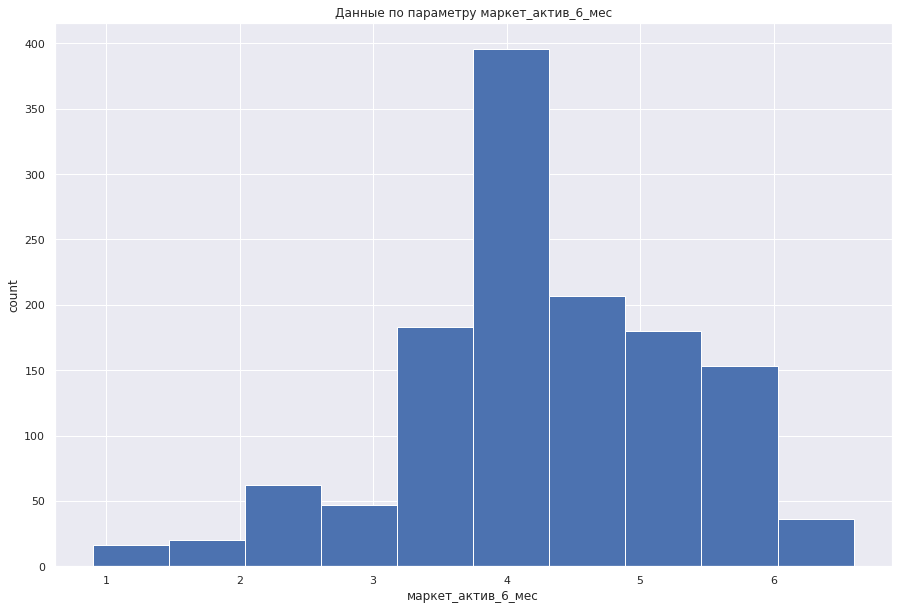

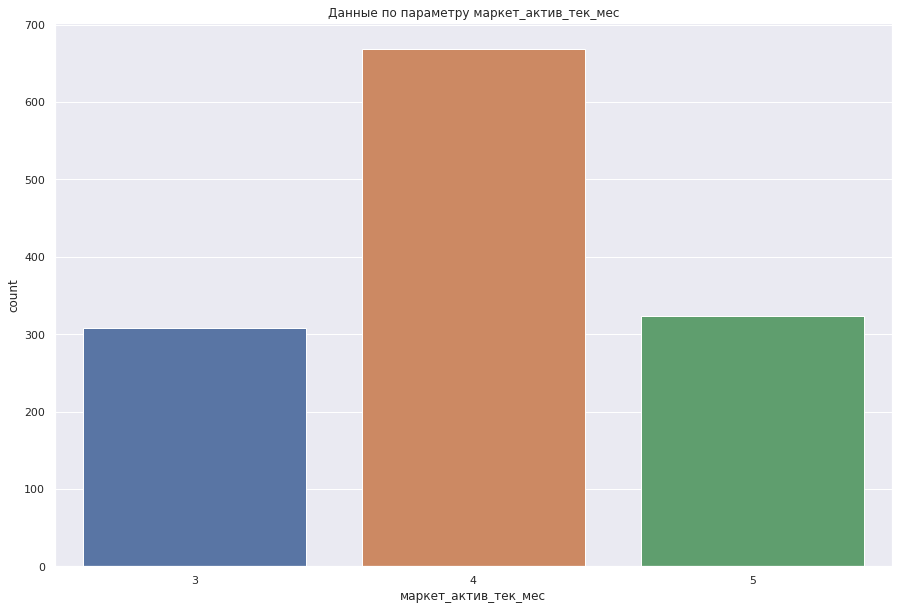

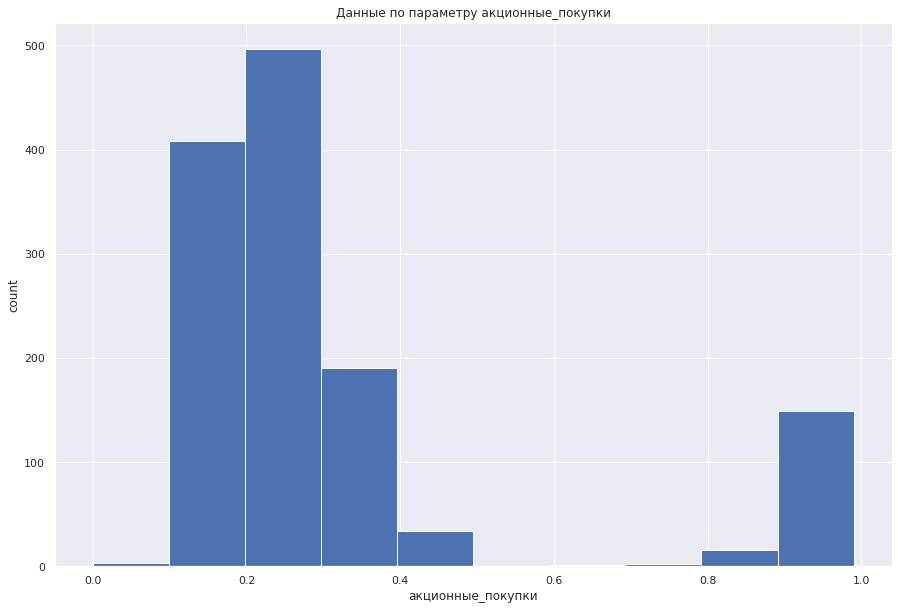

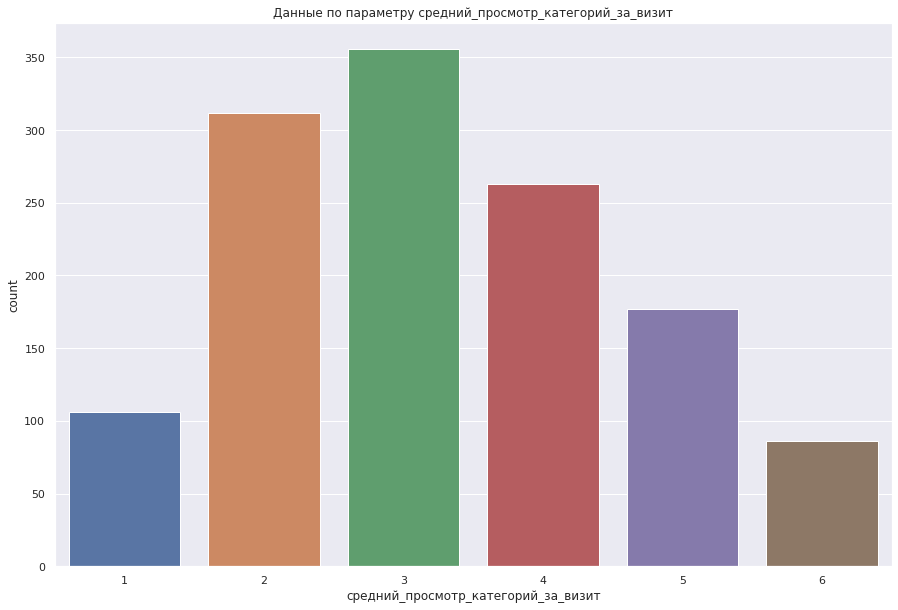

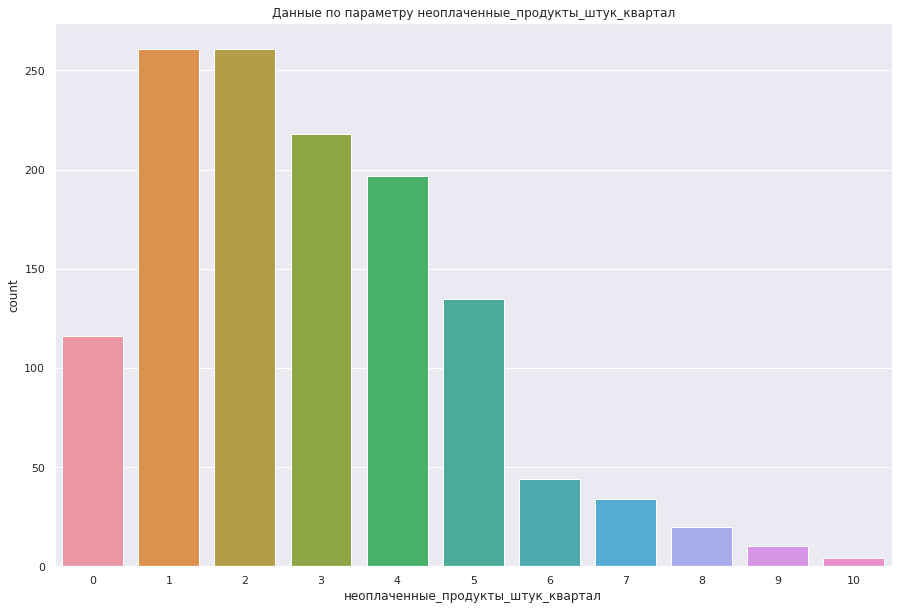

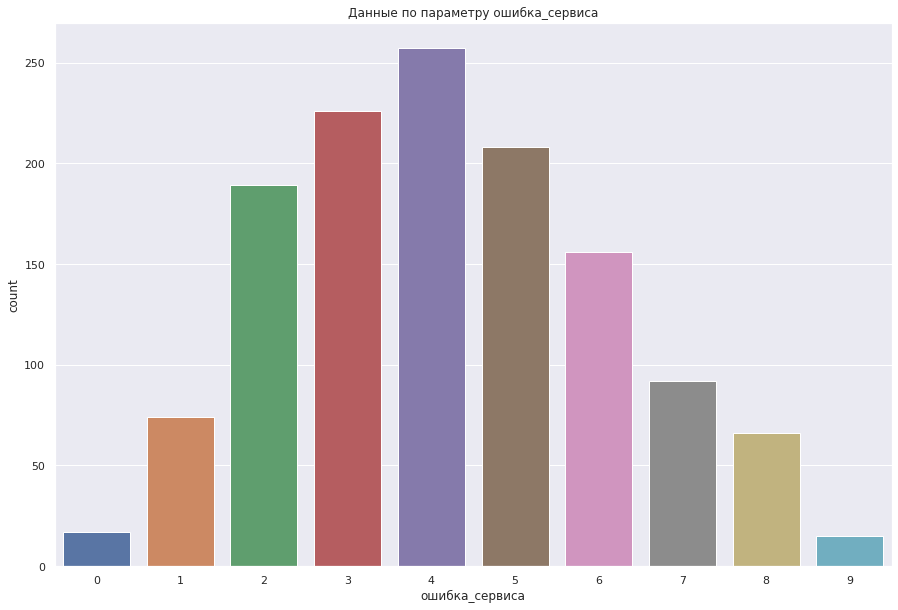

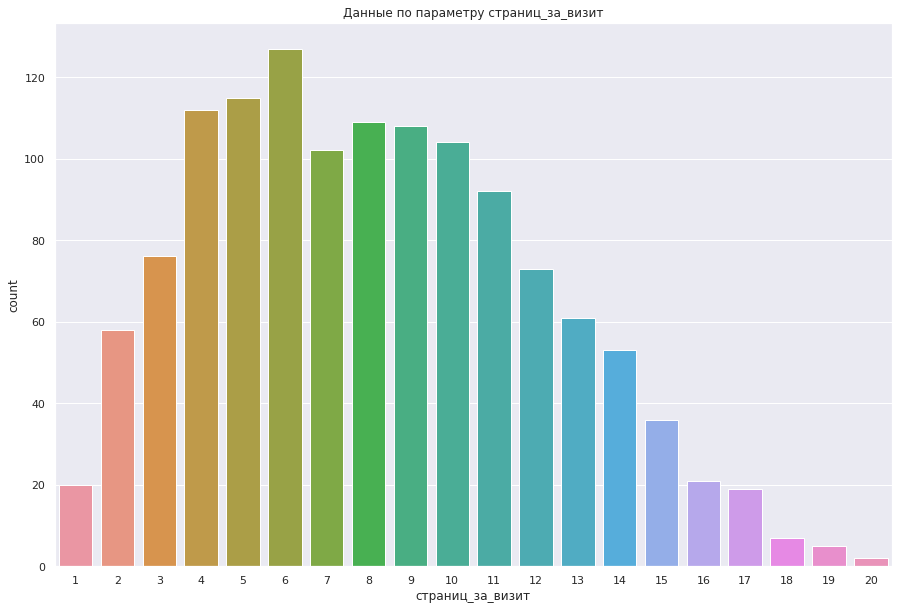

In [47]:
sns.set_theme(rc={'figure.figsize':(15,10)})
for column in _num_cols:
    plt.figure()
    plt.title(f'Данные по параметру {column}')
    
    if data_market_file[column].dtypes == 'int64':
        sns.countplot(x=column, data=data_market_file)
        
    else:
        data_market_file[column].plot(kind='hist', y='count')
    plt.xlabel(column)    
    plt.ylabel('count')
    plt.show()
    

In [48]:
#data_market_file[data_market_file.columns[data_market_file.columns != 'id']].hist (figsize=(20,20), bins=15);

просмотренные данные выглядят нормально, в категории *акционные_покупки* покупатели делятся на 2 группы, немало людей совершают покупки только по акциям. В категории *страниц_за_визит* есть пара всплесков в районе 5-6 и 10-11 страниц.

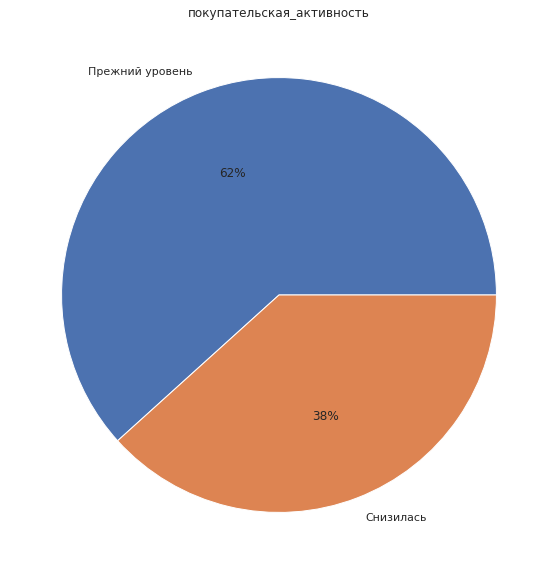

In [49]:
data_market_file['покупательская_активность'].value_counts().plot(title='покупательская_активность', label='',
                                                                  kind='pie', autopct = '%1.0f%%', figsize=(10,10));

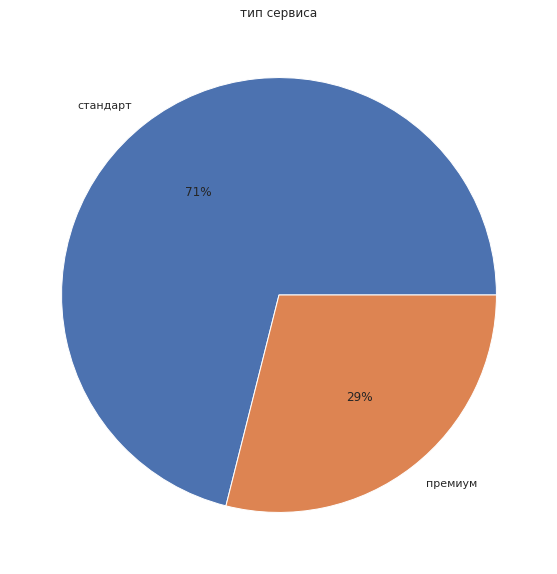

In [50]:
data_market_file['тип_сервиса'].value_counts().plot(title='тип сервиса', label='', kind='pie',
                                                    autopct = '%1.0f%%',figsize=(10,10));

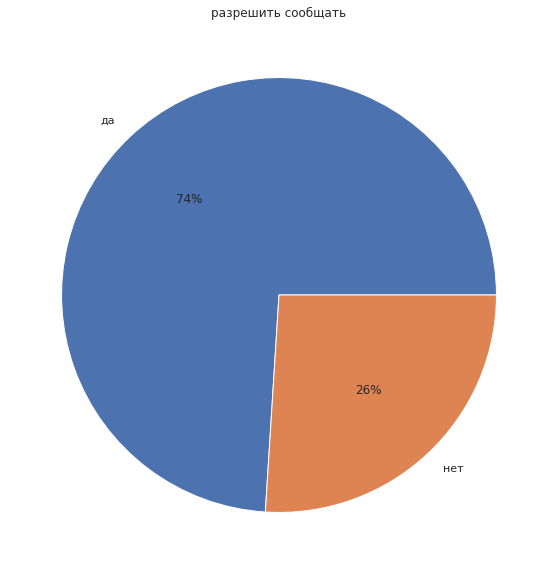

In [51]:
data_market_file['разрешить_сообщать'].value_counts().plot(title='разрешить сообщать', label='',
                                                           kind='pie', autopct = '%1.0f%%', figsize=(10,10));

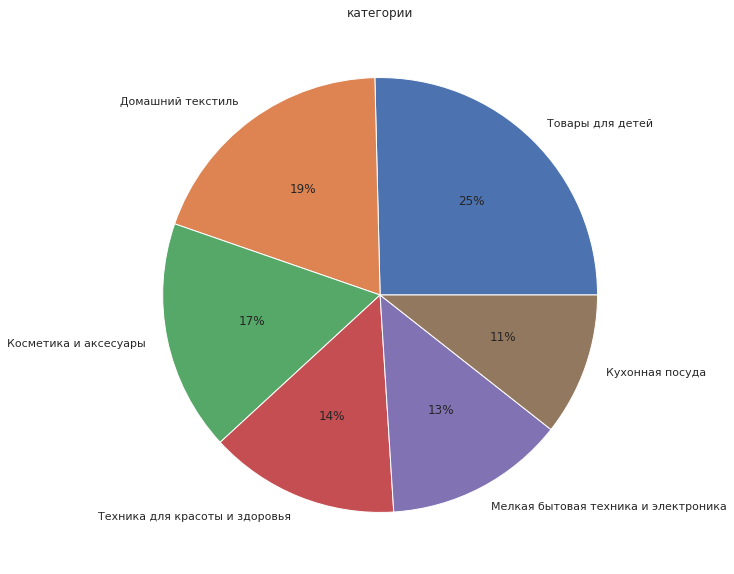

In [52]:
data_market_file['популярная_категория'].value_counts().plot(title='категории',label='', 
                                                             kind='pie', autopct = '%1.0f%%', figsize=(10,10));

По категориальным признакам можно сказать следующее:
* покупательская активность у 38% снизилась
* 29% покупателей выбирают премиум подписку
* 26% покупателей отказываются от рассылки
* 25% покупателей совершают покупки в категории товары для детей

***Оценим данные из таблицы data_market_money***

In [53]:
data_market_money.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       3900 non-null   int64  
 1   период   3900 non-null   object 
 2   выручка  3900 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 91.5+ KB


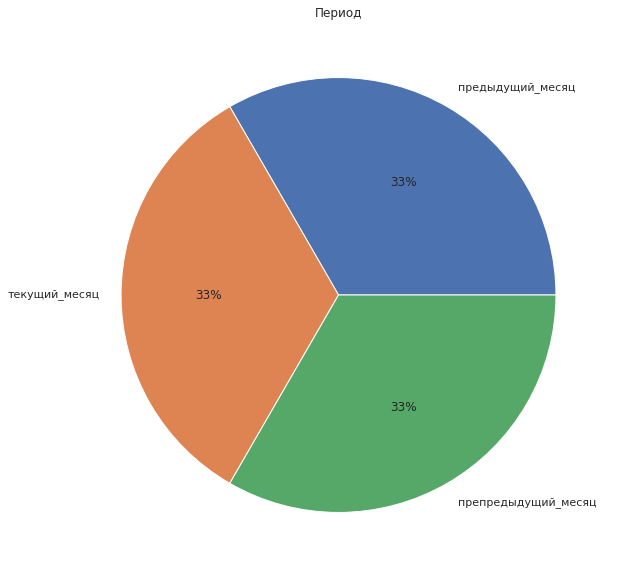

In [54]:
data_market_money['период'].value_counts().plot(title='Период', label='',
                                                kind='pie', autopct = '%1.0f%%', figsize=(10,10));

В каждом периоде одинаковое количество данных.

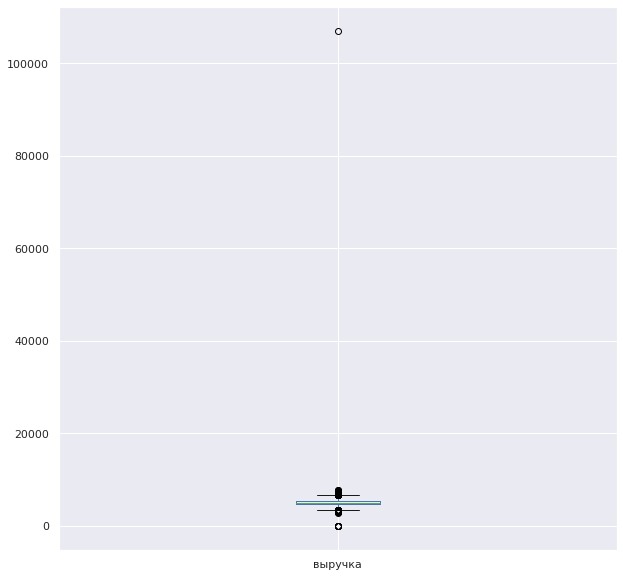

In [55]:
data_market_money['выручка'].plot(kind='box', figsize=(10,10));

In [56]:
#В данном случае видим выброс, избавимся от него
data_market_money[data_market_money['выручка'] > 20000]

,id,период,выручка
98,215380,текущий_месяц,106862.2


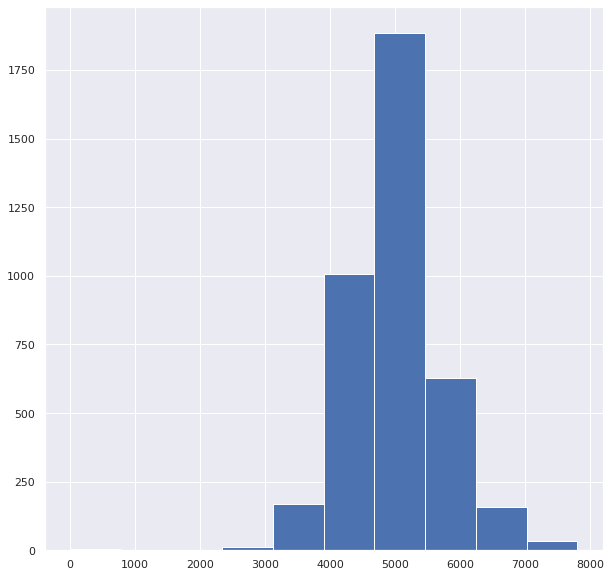

In [57]:
data_market_money[data_market_money['выручка'] < 20000]['выручка'].hist(bins=10, figsize=(10,10));

после удаления выброса, распределение похоже на нормальное.

In [58]:
#получим список id с выбросами по выручке
_id_list = list(data_market_money.loc[data_market_money[data_market_money['выручка'] > 20000].index]['id'])
_id_list

[215380]

In [59]:
#добавим id в список для удаления
id_list_to_del.extend(_id_list)

***Посмотрим следующую таблицу data_market_time***

In [60]:
data_market_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2600 non-null   int64 
 1   период  2600 non-null   object
 2   минут   2600 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 61.1+ KB


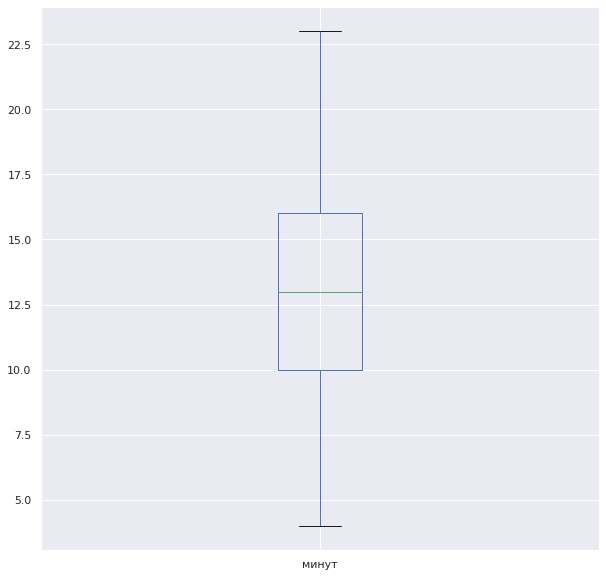

In [61]:
data_market_time['минут'].plot(kind='box', figsize=(10,10));

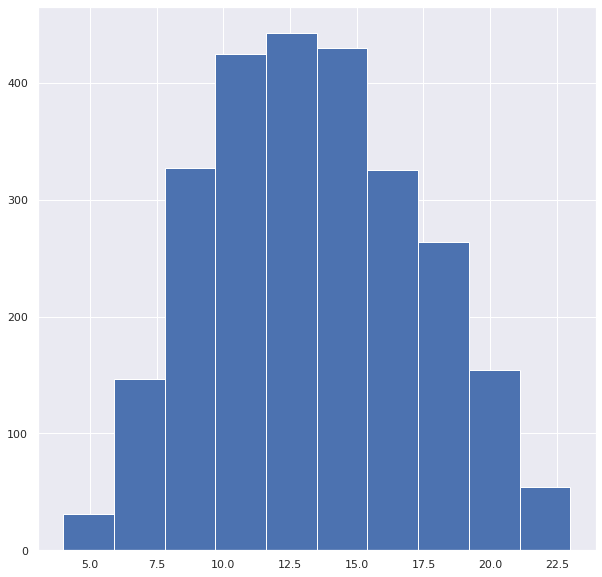

In [62]:
data_market_time['минут'].hist(bins=10, figsize=(10,10));

Признак распределен нормально

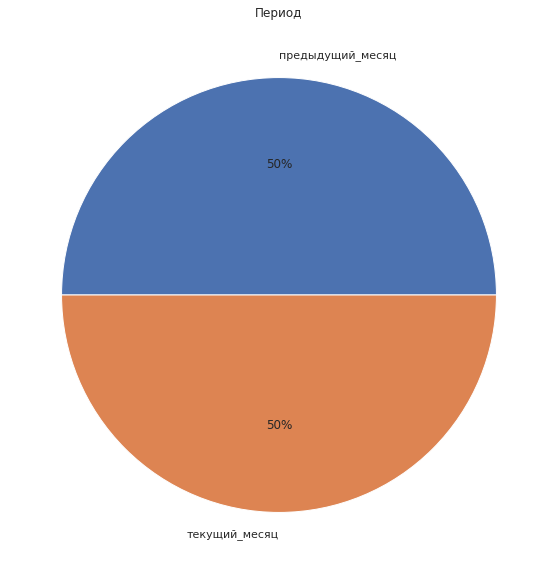

In [63]:
data_market_time['период'].value_counts().plot(title='Период', label='',
                                               kind='pie', autopct = '%1.0f%%', figsize=(10,10));

В каждом периоде одинаковое количество данных.

In [64]:
data_money.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       1300 non-null   int64  
 1   прибыль  1300 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 20.4 KB


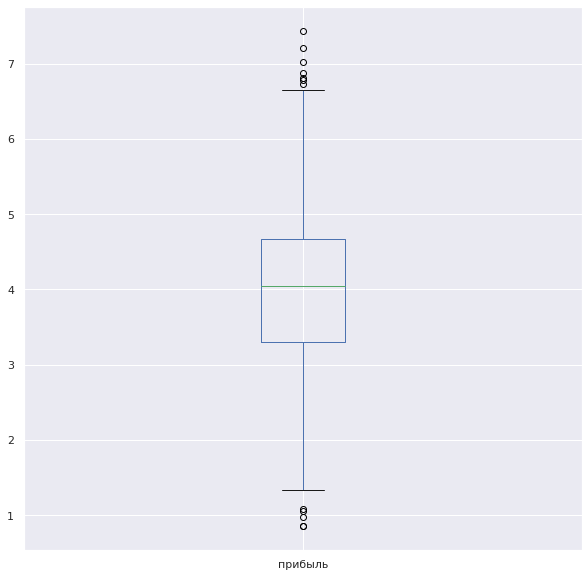

In [65]:
data_money['прибыль'].plot(kind='box', figsize=(10,10));

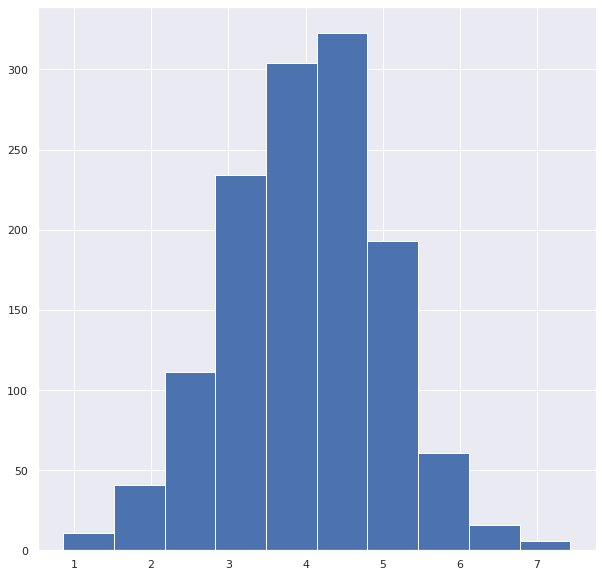

In [66]:
data_money['прибыль'].hist(figsize=(10,10));

In [67]:
# Удалим id, которые нас не интересуют из всех таблиц
data_market_file.drop(data_market_file[(data_market_file['id'].isin(id_list_to_del))].index, inplace = True)
data_market_money.drop(data_market_money[(data_market_money['id'].isin(id_list_to_del))].index, inplace = True)
data_market_time.drop(data_market_time[(data_market_time['id'].isin(id_list_to_del))].index, inplace = True)
data_money.drop(data_money[(data_money['id'].isin(id_list_to_del))].index, inplace = True)

**Вывод**<br>
В ходе исследовательского анализа данных:
* изучили распределние признаков каждого датасета
* посмотрели ка круговые диаграммы категориальных признаков
* составили список id, которые впоследствии, удалили из всех датасетов


## Объединение таблиц


Преобразуем датафреймы для объединения

In [68]:
data_market_money = data_market_money.pivot_table(index='id', columns='период')

In [69]:
data_market_money.columns = ['выручка_предыдущий_месяц', 'выручка_препредыдущий месяц', 'выручка_текущий_месяц']

In [70]:
data_market_money.sample(5)

,выручка_предыдущий_месяц,выручка_препредыдущий месяц,выручка_текущий_месяц
id,,,
215908,4396.0,4933.0,4991.4
215805,4126.0,4691.0,4746.1
216368,4082.0,4436.0,3905.2
215901,4606.0,5047.0,4353.8
215802,4955.0,5154.0,5257.9


In [71]:
data_market_time = data_market_time.pivot_table(index='id', columns='период')

In [72]:
data_market_time.columns= ['минут_предыдущий_месяц', 'минут_текущий_месяц']
    

In [73]:
data_market_time.sample(5)

,минут_предыдущий_месяц,минут_текущий_месяц
id,,
215596,14,8
216175,13,12
215916,18,12
216528,19,19
215729,9,11


In [74]:
data_full = data_market_file.join(data_market_time, on='id')
data_full = data_full.join(data_market_money, on='id')

In [75]:
data_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1296 entries, 1 to 1299
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1296 non-null   int64  
 1   покупательская_активность            1296 non-null   object 
 2   тип_сервиса                          1296 non-null   object 
 3   разрешить_сообщать                   1296 non-null   object 
 4   маркет_актив_6_мес                   1296 non-null   float64
 5   маркет_актив_тек_мес                 1296 non-null   int64  
 6   длительность                         1296 non-null   int64  
 7   акционные_покупки                    1296 non-null   float64
 8   популярная_категория                 1296 non-null   object 
 9   средний_просмотр_категорий_за_визит  1296 non-null   int64  
 10  неоплаченные_продукты_штук_квартал   1296 non-null   int64  
 11  ошибка_сервиса                

Преобразовали таблицы для последующего объединения, разбили столбцы по периодам.

## Корреляционный анализ

In [76]:
# переведем Id в индекс. Для дальнейшего анализа он нам не нужен, но сохранить для последующих отборов его, считаю нужным.
data_full.set_index('id', inplace=True)

In [77]:
interval_cols = ['актив_6_мес', 'длительность', 'акции', 'выручка_текущий_месяц', 'выручка_предыдущий_месяц',
       'выручка_препредыдущий месяц']

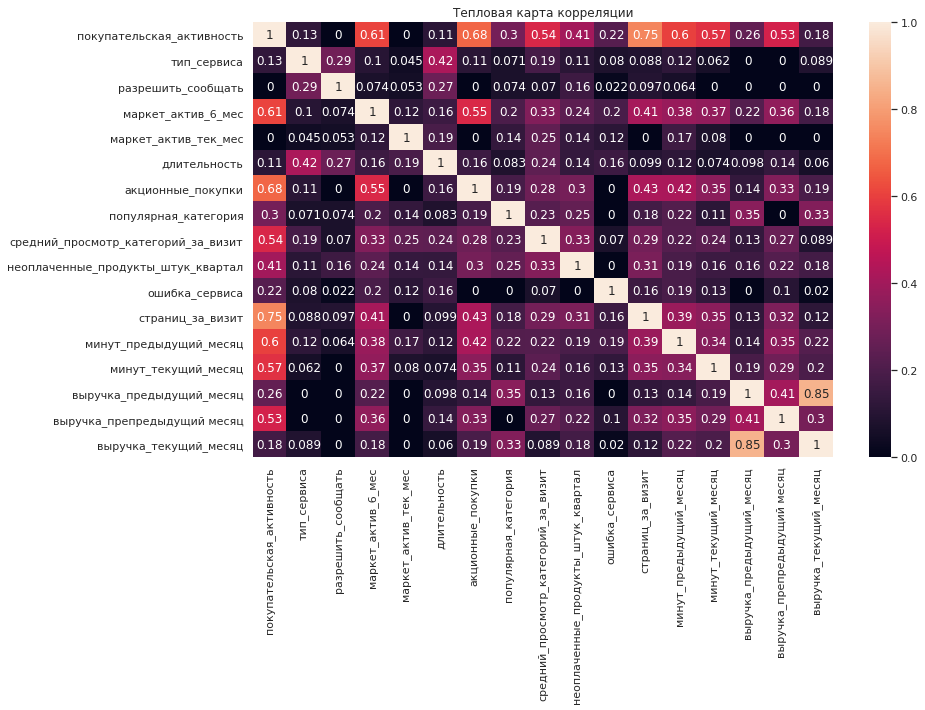

In [78]:
plt.figure(figsize=(13, 8))
sns.heatmap(data_full.phik_matrix(interval_cols=interval_cols, bins=6), annot=True) 
plt.title("Тепловая карта корреляции")
plt.show()

In [79]:
# plt.figure(figsize=(13, 8))
# sns.heatmap(data_full.phik_matrix(), annot=True) 
# plt.title("Тепловая карта корреляции")
# plt.show()

построили матрицу корреляций. Мультиколлинеарности не наблюдается, Самая большая корреляция признака "Покупательская активность" наблюдается с признаками *страниц_за_визит* и *минут предыдущий месяц*.

## Использование пайплайнов


In [80]:
# Разобьем датафрейм на выборки
X=data_full.drop('покупательская_активность', axis=1)
y=data_full['покупательская_активность']

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size = TEST_SIZE, 
    random_state = RANDOM_STATE,
    stratify = y)

In [81]:
#Не понимаю есть л смысл кодировать целевой признак.... Пока оставил без кодирования

label_encoder = LabelEncoder()

y_train_label = label_encoder.fit_transform(y_train)
y_test_label = label_encoder.transform(y_test)
label_encoder.classes_
pd.DataFrame(y_train_label, y_train, columns=['LabelEncoder'] )

,LabelEncoder
покупательская_активность,
Прежний уровень,0
Снизилась,1
Прежний уровень,0
Прежний уровень,0
Снизилась,1
...,...
Прежний уровень,0
Прежний уровень,0
Снизилась,1


In [83]:
X_train.head()
X_train.columns

Index(['тип_сервиса', 'разрешить_сообщать', 'маркет_актив_6_мес',
       'маркет_актив_тек_мес', 'длительность', 'акционные_покупки',
       'популярная_категория', 'средний_просмотр_категорий_за_визит',
       'неоплаченные_продукты_штук_квартал', 'ошибка_сервиса',
       'страниц_за_визит', 'минут_предыдущий_месяц', 'минут_текущий_месяц',
       'выручка_предыдущий_месяц', 'выручка_препредыдущий месяц',
       'выручка_текущий_месяц'],
      dtype='object')

In [84]:
#составим списки категорий
ohe_col = ['популярная_категория']
# Мы можем сказать, что одна категория важнее, такое мы наблюдаем в типе сервиса,
# где "премиальную" категорию можно считать рангом выше, чем "стандартную" категорию,
# поэтому будет правильным применить OrdinalEncoder
ord_col = ['тип_сервиса', 'разрешить_сообщать']

In [85]:
num_col = ['маркет_актив_6_мес', 'маркет_актив_тек_мес', 'длительность', 'акционные_покупки',
       'средний_просмотр_категорий_за_визит','неоплаченные_продукты_штук_квартал', 'ошибка_сервиса',
       'страниц_за_визит', 'минут_предыдущий_месяц', 'минут_текущий_месяц','выручка_предыдущий_месяц',
       'выручка_препредыдущий месяц', 'выручка_текущий_месяц']

In [86]:
ohe_pipe = Pipeline(
    [
        ('simple_imputer_ohe', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
        ('ohe', OneHotEncoder(drop='first', handle_unknown='ignore'))
    ]
)

In [87]:
ord_pipe = Pipeline(
    [
        (
            'simple_imputer_ord_before',
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        ),
        (
            'ord',
            OrdinalEncoder(categories=[
                                      ['стандарт','премиум'],
                                      ['да', 'нет']
            ],
                          handle_unknown='use_encoded_value',
                          unknown_value=np.nan)
        ),
        (
            'simple_imputer_ord_after',
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        )
    ]
)

In [88]:
data_preprocessor = ColumnTransformer(
    [('ord', ord_pipe, ord_col),
     ('ohe', ohe_pipe, ohe_col),
     ('num', MinMaxScaler(), num_col)
    ], 
    remainder='passthrough'
)

In [89]:
pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', DecisionTreeClassifier(random_state=RANDOM_STATE))
])

In [90]:
param_grid = [
    # словарь для модели DecisionTreeClassifier()
    {
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'models__max_depth': range(2, 7),
        'models__max_features': range(2,7),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },
    
    # словарь для модели KNeighborsClassifier() 
    {
        'models': [KNeighborsClassifier()],
        'models__n_neighbors': range(2,5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']   
    },

    # словарь для модели LogisticRegression()
    {
        'models': [LogisticRegression(
            random_state=RANDOM_STATE, 
            solver='liblinear', 
            penalty='l1'
        )],
        'models__C': range(1,5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },
    # словарь для модели SVC()
    {
        'models': [SVC(random_state=RANDOM_STATE, kernel='poly', probability=True)],
        'models__degree': range(2, 3),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
    }
]

In [91]:
randomized_search = RandomizedSearchCV(
    pipe_final, 
    param_grid, 
    cv=5,
    scoring='roc_auc',
    random_state=RANDOM_STATE,
    n_jobs=-1
)

In [92]:
data_full.head()

,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,минут_предыдущий_месяц,минут_текущий_месяц,выручка_предыдущий_месяц,выручка_препредыдущий месяц,выручка_текущий_месяц
id,,,,,,,,,,,,,,,,,
215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,12,10,5216.0,4472.0,4971.6
215350,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5,8,13,5457.5,4826.0,5058.4
215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4,11,13,6158.0,4793.0,6610.4
215352,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2,8,11,5807.5,4594.0,5872.5
215353,Снизилась,стандарт,да,3.3,4,762,0.26,Домашний текстиль,4,1,1,4,10,10,4738.5,5124.0,5388.5


In [93]:
randomized_search.fit(X_train, y_train_label)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('ord',
                                                                               Pipeline(steps=[('simple_imputer_ord_before',
                                                                                                SimpleImputer(strategy='most_frequent')),
                                                                                               ('ord',
                                                                                                OrdinalEncoder(categories=[['стандарт',
                                                                                                                            'премиум'],
                                                                                                                           ['да',
                                                                                                                            'нет']],
                                                                                                               handle_unknown='use_encoded_value',
                                                                                                               unknown_value=nan)),
                                                                                               ('simple_...
                                        {'models': [LogisticRegression(penalty='l1',
                                                                       random_state=42,
                                                                       solver='liblinear')],
                                         'models__C': range(1, 5),
                                         'preprocessor__num': [StandardScaler(),
                                                               MinMaxScaler(),
                                                               'passthrough']},
                                        {'models': [SVC(kernel='poly',
                                                        probability=True,
                                                        random_state=42)],
                                         'models__degree': range(2, 3),
                                         'preprocessor__num': [StandardScaler(),
                                                               MinMaxScaler(),
                                                               'passthrough']}],
                   random_state=42, scoring='roc_auc')

In [94]:
print('Лучшая модель и её параметры:\n\n', randomized_search.best_estimator_)
print ('Метрика лучшей модели на кросс-валидационной выборке:', round(randomized_search.best_score_, 5))

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ord',
                                                  Pipeline(steps=[('simple_imputer_ord_before',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ord',
                                                                   OrdinalEncoder(categories=[['стандарт',
                                                                                               'премиум'],
                                                                                              ['да',
                                                                                               'нет']],
                                                                                  handle_unknown='use_encoded_value',
  

ЛУчшей моделью получилась ***LogisticRegression(C=1, penalty='l1', random_state=42, solver='liblinear')***. Метрика на кросс--валидационной выборке 0.896, довольно хорошо

In [95]:
# проверьте работу модели на тестовой выборке
# рассчитайте прогноз на тестовых данных
y_test_pred = randomized_search.predict(X_test)
y_test_proba = randomized_search.predict_proba(X_test)
print(f'Метрика ROC-AUC на тестовой выборке: {round(roc_auc_score(y_test_label, y_test_proba[:,1]), 5)}')

Метрика ROC-AUC на тестовой выборке: 0.91668


In [96]:
print(f'Метрика F1-score на тестовой выборке: {round(f1_score(y_test_label, y_test_pred), 5)}')

Метрика F1-score на тестовой выборке: 0.86325


###### Метрики на тестовой выборке roc-auc 0.917, f1 0.863, показатели довольно высокие и близкие

**Вывод** <br>
* Использовали пайплайны для применения изученных моделей. <br>
* Обучили 4 модели, предварительно подобрав для них гиперпараметры <br>
* Расчитали метрики F1-score и ROC-AUC для тестовой выборки. Каждая из метрики покрывает свои нюансы, ROC-AUC не зависит от соотношения положительных и отрицательных примеров в наборе данных и может быть использована для сравнения моделей с разными порогами классификации, но не учитывает дисбаланс классов в данных. В то же время F1 учитывает как точность, так и полноту модели и подходит для задач, где важен баланс между этими двумя показателями. На тестовой выборке метрики показывают близкие результаты, что говорит о том, что модель имеет сбалансированный результат по точности и полноте.<br>


## Анализ важности признаков

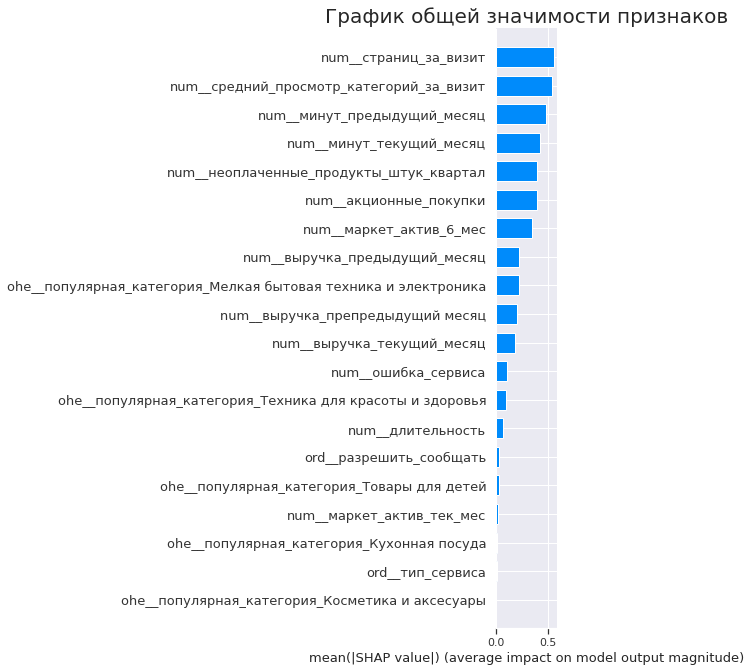

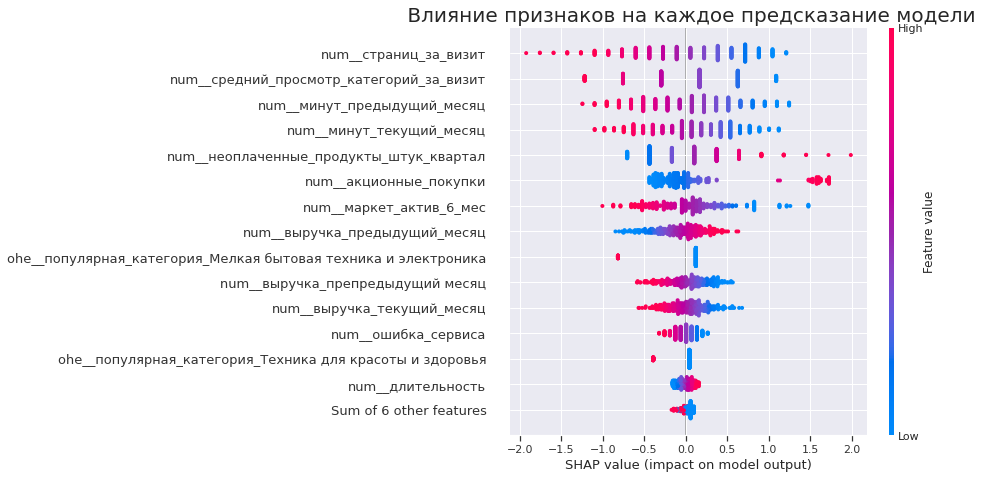

In [97]:

#поиск важных признаков
X_encoded_1 = randomized_search.best_estimator_['preprocessor'].fit_transform(X_train)
X_test_transformed = randomized_search.best_estimator_['preprocessor'].transform(X_test)

feature_names = randomized_search.best_estimator_.named_steps['preprocessor'].get_feature_names_out()

X_test_df = pd.DataFrame(X_test_transformed, columns=feature_names)

explainer_1 = shap.LinearExplainer(randomized_search.best_estimator_.named_steps['models'], X_encoded_1, feature_names=feature_names)
shap_values = explainer_1(X_test_df)

plt.title('График общей значимости признаков',  fontdict = {'fontsize' : 20})
shap.summary_plot(shap_values, plot_type='bar', feature_names=feature_names) 
plt.title(' Влияние признаков на каждое предсказание модели', fontdict = {'fontsize' : 20})
shap.plots.beeswarm(shap_values,  max_display=15)

основные параметры влияющие на активность это *акционные_покупки*, *минут_текущий_месяц*, *минут_предыдущий_месяц*, *страниц_за_визит*, *средний_просмотр_категорий_за_визит*, *неоплаченные_продукты_штук_квартал*

In [98]:
#занесем данные о расчетных вероятностях снижения активности в тестовую выборку
X_test['вероятность_снижения'] = y_test_proba[:,1]
data = X_test.sort_values(by='вероятность_снижения')
data.head()

,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,минут_предыдущий_месяц,минут_текущий_месяц,выручка_предыдущий_месяц,выручка_препредыдущий месяц,выручка_текущий_месяц,вероятность_снижения
id,,,,,,,,,,,,,,,,,
215775,стандарт,нет,5.0,4,157,0.15,Мелкая бытовая техника и электроника,5,0,5,13,19,16,4028.0,4934.0,3372.8,0.003106
216624,стандарт,да,5.4,5,806,0.17,Домашний текстиль,6,1,8,11,22,19,5565.5,5096.0,6102.4,0.003204
216410,премиум,да,4.8,3,939,0.11,Домашний текстиль,6,1,7,12,21,23,4273.0,4465.0,4236.6,0.003668
216589,стандарт,да,4.1,5,447,0.14,Косметика и аксесуары,6,0,9,12,20,17,5430.5,5045.0,5894.6,0.004959
216553,стандарт,да,6.1,4,298,0.27,Домашний текстиль,6,3,6,16,19,14,5028.5,5039.0,5149.4,0.006374


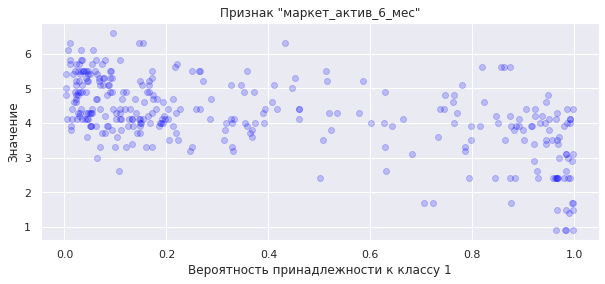

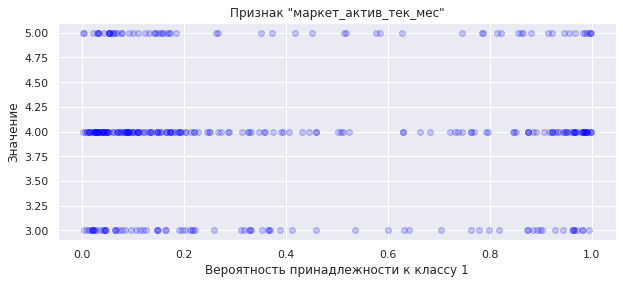

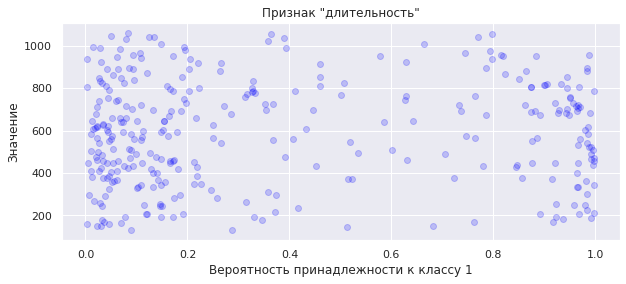

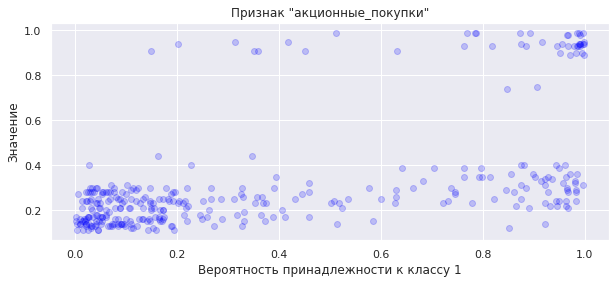

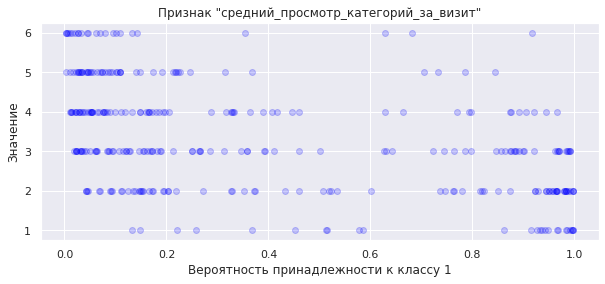

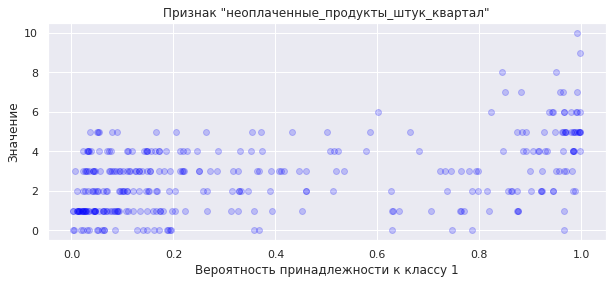

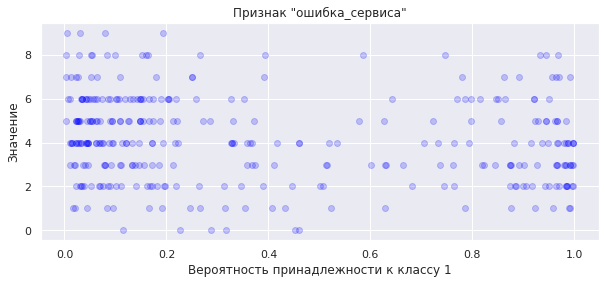

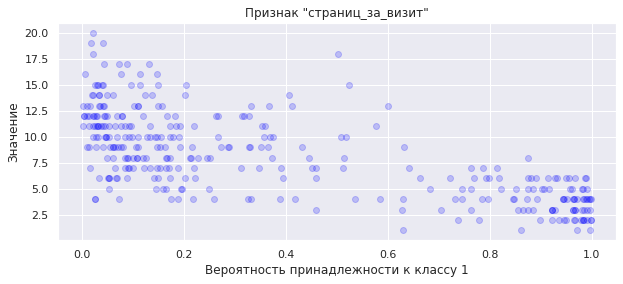

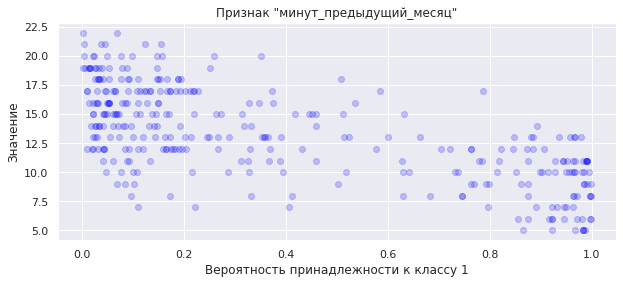

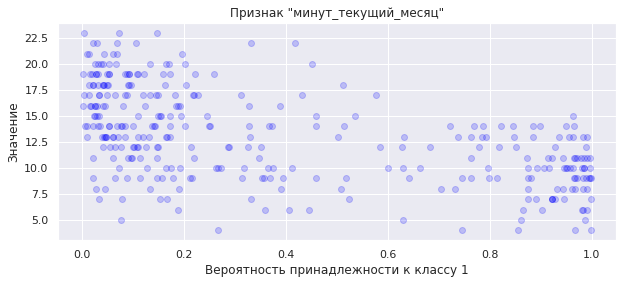

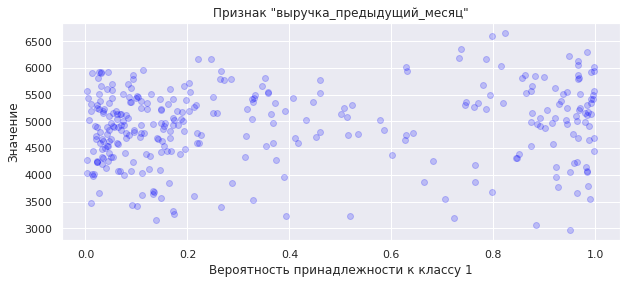

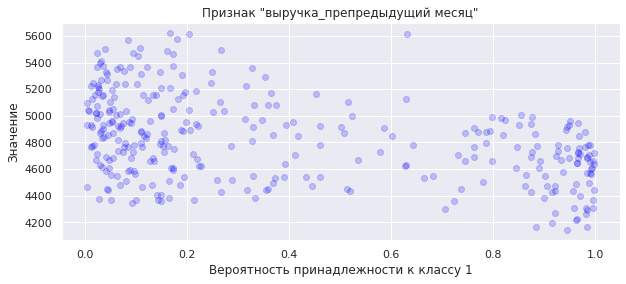

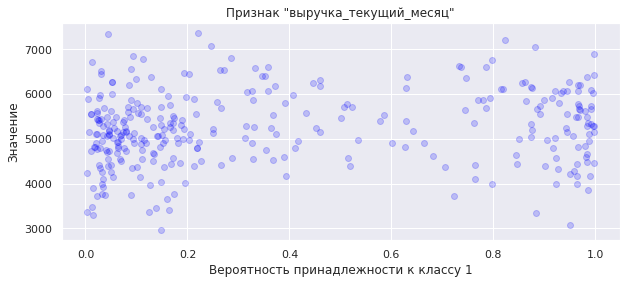

In [99]:
#построение scatter plot для распределения числовых 
#признаков в зависимости от вероятности принадлежности к классу

for name in num_col:
    plt.figure(figsize=(10, 4))
    plt.title(f'Признак "{name}"')
    plt.xlabel('Вероятность принадлежности к классу 1')
    plt.ylabel(f'Значение')
    plt.scatter(x=data['вероятность_снижения'], 
                y=data[name],
                alpha=0.2, 
                c='Blue')

# Сегментация покупателей <br>
Следующим этапом исследования будет выделение определённой группы пользователей и анализ их поведения. Это позволит нам разработать рекомендации для заказчика о том, как повысить активность выбранной группы.

Как обычный пользователь маркетплейса, я не совсем понимаю, как можно делать предсказания о людях и анализировать их решения. Поэтому сначала я решил построить диаграмму рассеяния прибыли и вероятности снижения активности пользователей, которую определила модель.

In [100]:
y_test_proba = randomized_search.predict_proba(X_test)[:,1]
y_train_proba = randomized_search.predict_proba(X_train)[:,1]

In [101]:
data_money

,id,прибыль
1,215349,4.16
2,215350,3.13
3,215351,4.87
4,215352,4.21
5,215353,3.95
...,...,...
1295,216643,4.44
1296,216644,6.11
1297,216645,3.29
1298,216646,4.03


In [102]:
#Создадим датафрейм с данными о покупателях из тестовой выборки, 
#дополненный информацией о вероятности снижения покупательской активности и
# данными о среднемесячной прибыли покупателя за последние 3 месяца
X_test_full = X_test.copy()

X_test_full['вероятность_снижения'] = y_test_proba

data_money = data_money.set_index('id')
X_test_full = X_test_full.join(data_money)

In [103]:

X_test_full.head(10)

,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,минут_предыдущий_месяц,минут_текущий_месяц,выручка_предыдущий_месяц,выручка_препредыдущий месяц,выручка_текущий_месяц,вероятность_снижения,прибыль
id,,,,,,,,,,,,,,,,,,
216161,стандарт,да,4.1,4,606,0.15,Техника для красоты и здоровья,6,1,4,12,16,17,3973.0,4912.0,3289.2,0.013919,4.69
215654,премиум,нет,1.4,4,684,0.94,Товары для детей,3,6,1,6,11,9,3548.0,4656.0,4170.7,0.988923,2.75
216307,премиум,да,3.3,4,488,0.13,Домашний текстиль,4,2,8,10,20,11,5444.0,4565.0,6335.8,0.098158,3.16
215501,премиум,да,3.5,3,1057,0.35,Домашний текстиль,4,3,5,6,9,9,6604.0,4993.0,6758.7,0.798059,3.74
215934,стандарт,нет,5.5,4,147,0.99,Мелкая бытовая техника и электроника,1,2,3,7,15,18,5090.0,4451.0,5773.8,0.512493,4.40
216576,стандарт,да,5.8,4,176,0.28,Домашний текстиль,6,2,4,6,18,15,4334.0,5150.0,3756.8,0.033301,3.20
216465,стандарт,да,4.9,4,739,0.17,Мелкая бытовая техника и электроника,5,1,4,4,18,15,5505.5,5180.0,5917.6,0.025751,2.03
216527,стандарт,нет,4.9,3,679,0.15,Техника для красоты и здоровья,4,1,1,14,12,19,4668.0,5023.0,5106.1,0.020148,3.26
215885,стандарт,да,5.5,4,625,0.16,Косметика и аксесуары,3,3,7,5,13,14,5150.5,5326.0,5128.4,0.249237,3.89


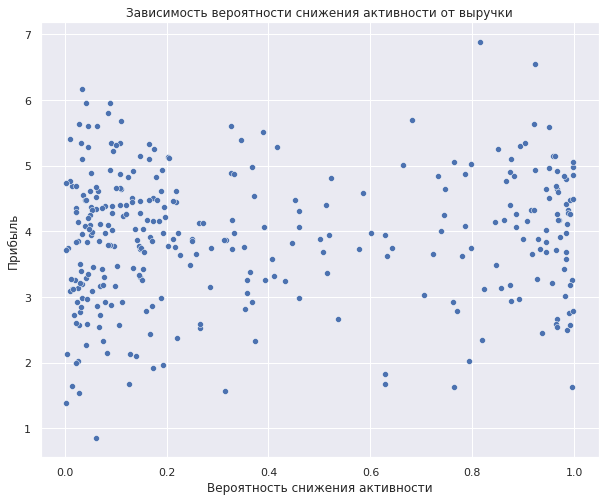

In [104]:
fig = plt.figure(figsize=(10,8))
sns.scatterplot(data=X_test_full, y='прибыль', x='вероятность_снижения')
plt.xlabel('Вероятность снижения активности')
plt.ylabel('Прибыль')
plt.title('Зависимость вероятности снижения активности от выручки')
plt.show()

In [105]:
def show_scatterplots(cat_col, df):
    for col in cat_col:
        fig = plt.figure(figsize=(10,10))
        sns.scatterplot(data=df, y='прибыль', x='вероятность_снижения', hue=col)
        plt.xlabel('Вероятность снижения активности')
        plt.ylabel('Прибыль')
        plt.title(f'Зависимость вероятности снижения активности от {col}')
        plt.show()

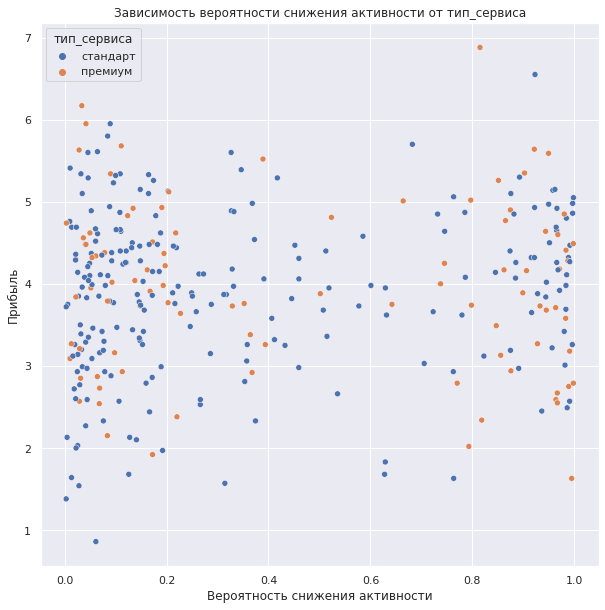

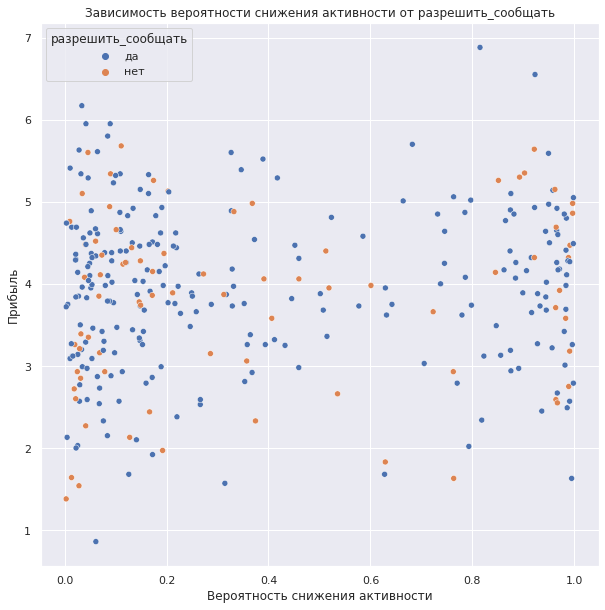

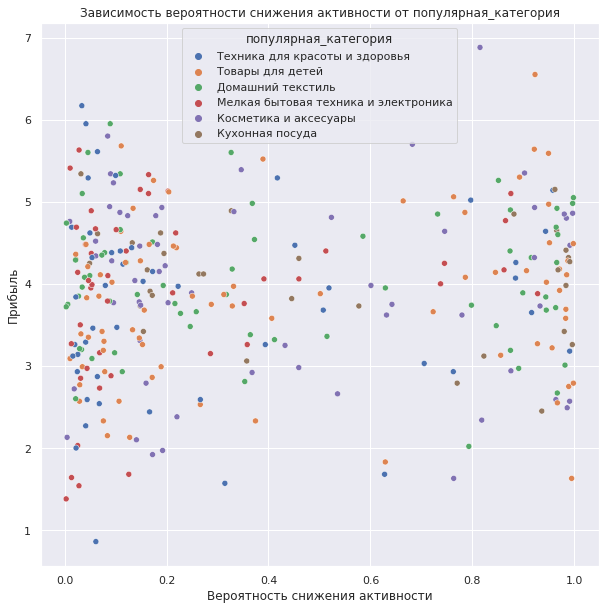

In [106]:
cat_col = list(X_test_full.select_dtypes(include='object').columns)
show_scatterplots(cat_col, X_test_full)

# Сегментация покупателей


In [107]:
# Отберем пользователей, которым модель предстказала снижение активности
# сделаем две группы по вероятности снижения покупательской активности для дальнейшего сравнения и выводов о действиях,
# которые следует предпринять для повышения покупательской активности у "группы риска"
# Для этих групп возьмем по 15% самых активных и неактивных покупателей

data_low_activity = X_test_full[X_test_full['вероятность_снижения'] > 0.85]
data_high_activity = X_test_full[X_test_full['вероятность_снижения'] < 0.15]

In [108]:
data_low_activity.head()

,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,минут_предыдущий_месяц,минут_текущий_месяц,выручка_предыдущий_месяц,выручка_препредыдущий месяц,выручка_текущий_месяц,вероятность_снижения,прибыль
id,,,,,,,,,,,,,,,,,,
215654,премиум,нет,1.4,4,684,0.94,Товары для детей,3,6,1,6,11,9,3548.0,4656.0,4170.7,0.988923,2.75
215375,премиум,да,3.0,4,558,0.89,Товары для детей,3,3,7,4,8,9,5253.5,4715.0,5633.1,0.970751,4.18
215452,стандарт,да,3.8,4,756,0.90,Товары для детей,2,3,6,4,11,10,4045.0,4963.0,4206.2,0.951158,4.50
215484,премиум,нет,2.9,5,448,0.23,Товары для детей,4,2,6,3,5,7,5059.0,4267.0,5018.7,0.921347,5.64
215671,премиум,да,4.0,4,820,0.22,Косметика и аксесуары,1,4,8,6,7,8,5379.5,4670.0,6034.7,0.932599,3.73


In [109]:
data_low_activity.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73 entries, 215654 to 215670
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   тип_сервиса                          73 non-null     object 
 1   разрешить_сообщать                   73 non-null     object 
 2   маркет_актив_6_мес                   73 non-null     float64
 3   маркет_актив_тек_мес                 73 non-null     int64  
 4   длительность                         73 non-null     int64  
 5   акционные_покупки                    73 non-null     float64
 6   популярная_категория                 73 non-null     object 
 7   средний_просмотр_категорий_за_визит  73 non-null     int64  
 8   неоплаченные_продукты_штук_квартал   73 non-null     int64  
 9   ошибка_сервиса                       73 non-null     int64  
 10  страниц_за_визит                     73 non-null     int64  
 11  минут_предыдущий_месяц   

In [110]:
data_low_activity.describe()

,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,минут_предыдущий_месяц,минут_текущий_месяц,выручка_предыдущий_месяц,выручка_препредыдущий месяц,выручка_текущий_месяц,вероятность_снижения,прибыль
count,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000
mean,3.246575,3.986301,573.547945,0.558904,2.328767,4.273973,3.808219,3.780822,9.054795,9.452055,5035.157534,4602.671233,5316.082192,0.945614,4.086986
std,1.131135,0.656022,221.691417,0.323675,1.014544,1.966810,1.875704,1.520659,2.532513,2.614283,743.583986,225.120773,805.066198,0.043385,0.925682
min,0.900000,3.000000,167.000000,0.120000,1.000000,0.000000,1.000000,1.000000,5.000000,4.000000,2960.000000,4138.000000,3078.300000,0.851015,1.630000
25%,2.400000,4.000000,399.000000,0.290000,2.000000,3.000000,2.000000,3.000000,7.000000,8.000000,4657.000000,4435.000000,4821.000000,0.916121,3.420000
50%,3.500000,4.000000,602.000000,0.360000,2.000000,4.000000,3.000000,4.000000,10.000000,10.000000,5130.500000,4646.000000,5342.100000,0.961851,4.180000
75%,4.000000,4.000000,731.000000,0.930000,3.000000,5.000000,5.000000,5.000000,11.000000,11.000000,5551.000000,4755.000000,5907.700000,0.983514,4.800000
max,5.600000,5.000000,954.000000,0.990000,6.000000,10.000000,8.000000,8.000000,14.000000,15.000000,6291.500000,5002.000000,7063.000000,0.998132,6.550000


In [111]:
data_high_activity.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 134 entries, 216161 to 216233
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   тип_сервиса                          134 non-null    object 
 1   разрешить_сообщать                   134 non-null    object 
 2   маркет_актив_6_мес                   134 non-null    float64
 3   маркет_актив_тек_мес                 134 non-null    int64  
 4   длительность                         134 non-null    int64  
 5   акционные_покупки                    134 non-null    float64
 6   популярная_категория                 134 non-null    object 
 7   средний_просмотр_категорий_за_визит  134 non-null    int64  
 8   неоплаченные_продукты_штук_квартал   134 non-null    int64  
 9   ошибка_сервиса                       134 non-null    int64  
 10  страниц_за_визит                     134 non-null    int64  
 11  минут_предыдущий_месяц  

In [112]:
data_high_activity.describe()

,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,минут_предыдущий_месяц,минут_текущий_месяц,выручка_предыдущий_месяц,выручка_препредыдущий месяц,выручка_текущий_месяц,вероятность_снижения,прибыль
count,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000
mean,4.702985,3.977612,561.619403,0.205075,4.037313,2.037313,4.559701,10.858209,15.589552,15.462687,4819.958955,4930.895522,5065.979104,0.067007,3.850672
std,0.778754,0.654268,245.522025,0.087632,1.305896,1.384157,1.849654,3.367588,3.167534,3.896512,632.627131,303.380410,790.988388,0.041877,1.058458
min,2.600000,3.000000,129.000000,0.110000,1.000000,0.000000,0.000000,4.000000,7.000000,5.000000,3155.000000,4346.000000,2952.200000,0.003106,0.860000
25%,4.100000,4.000000,381.000000,0.140000,3.000000,1.000000,3.000000,9.000000,14.000000,13.000000,4363.750000,4714.750000,4676.375000,0.031604,3.145000
50%,4.700000,4.000000,552.000000,0.185000,4.000000,2.000000,5.000000,11.000000,16.000000,16.000000,4864.250000,4933.000000,5081.100000,0.060760,3.970000
75%,5.300000,4.000000,734.000000,0.250000,5.000000,3.000000,6.000000,13.000000,18.000000,19.000000,5292.375000,5157.250000,5536.500000,0.097619,4.515000
max,6.600000,5.000000,1061.000000,0.910000,6.000000,5.000000,9.000000,20.000000,22.000000,23.000000,5957.500000,5568.000000,7338.200000,0.149255,6.170000


In [113]:
#особо ничего это не дает, убрал пока

# построим scatterplots по категориальным признакам
#cat_col = list(data_low_activity.select_dtypes(include='object').columns)
#show_scatterplots(cat_col, data_low_activity)

In [114]:
#data_low_activity.hist(figsize=(20,20),bins=8);

In [115]:
#data_high_activity.hist(figsize=(20,20),bins=8);

In [116]:
#Создадим список самых важных признаков
high_impact = ['акционные_покупки',
               'минут_текущий_месяц',
               'минут_предыдущий_месяц',
               'страниц_за_визит',
               'средний_просмотр_категорий_за_визит',
               'неоплаченные_продукты_штук_квартал' ]

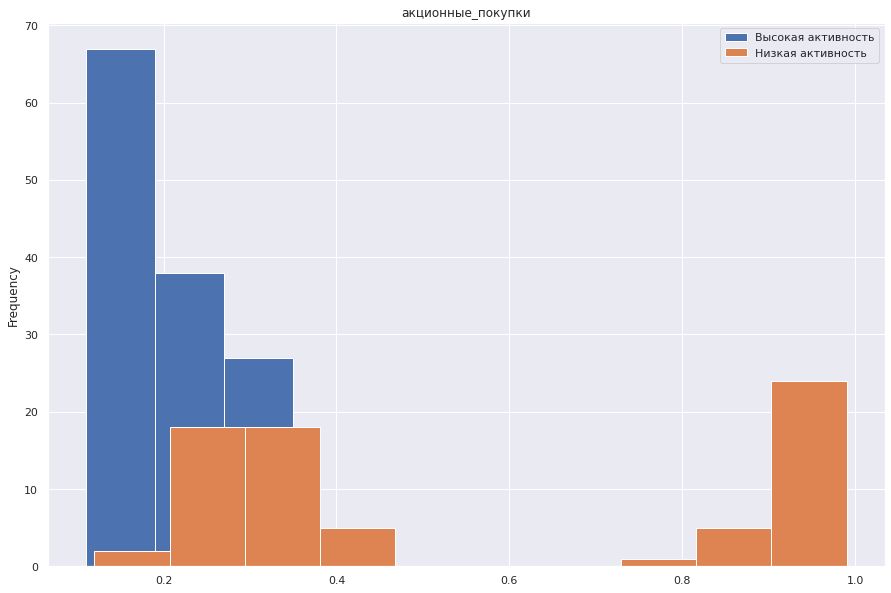

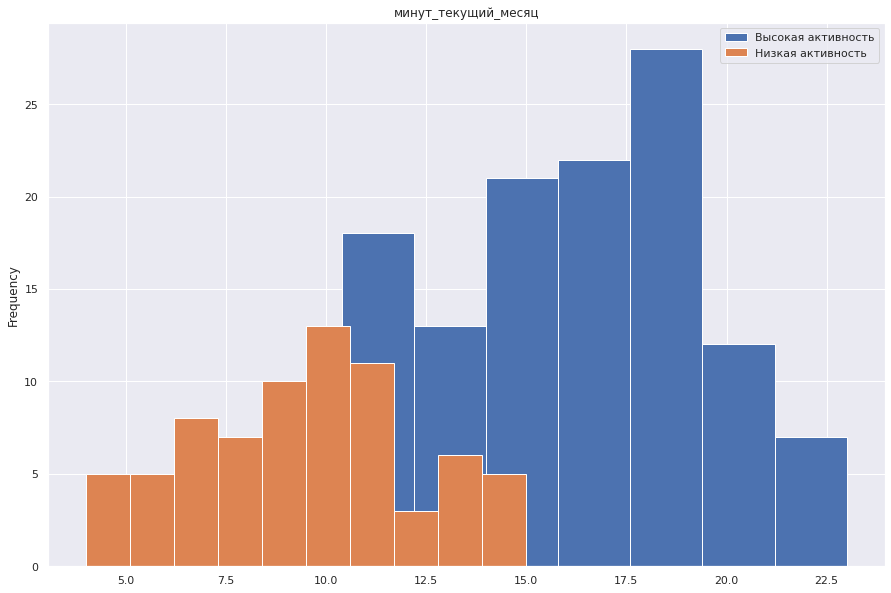

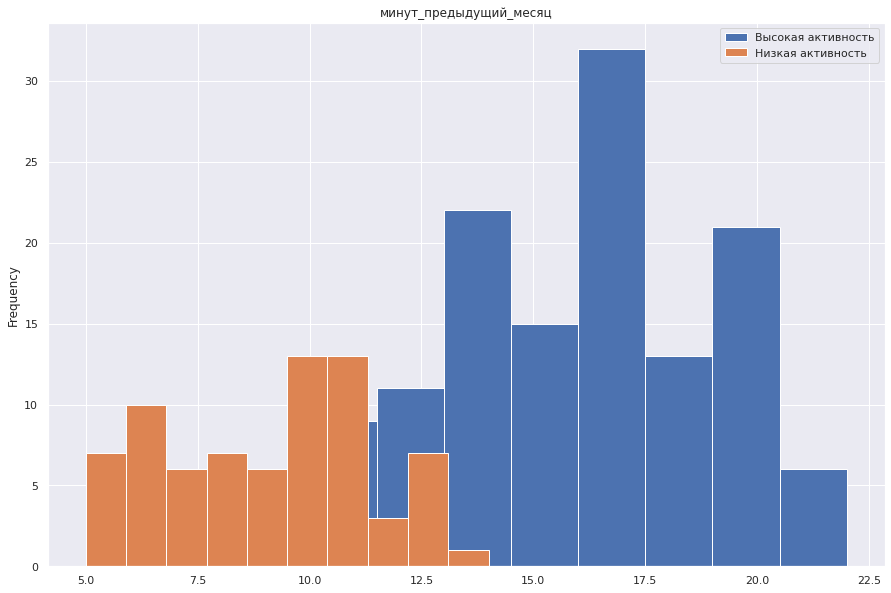

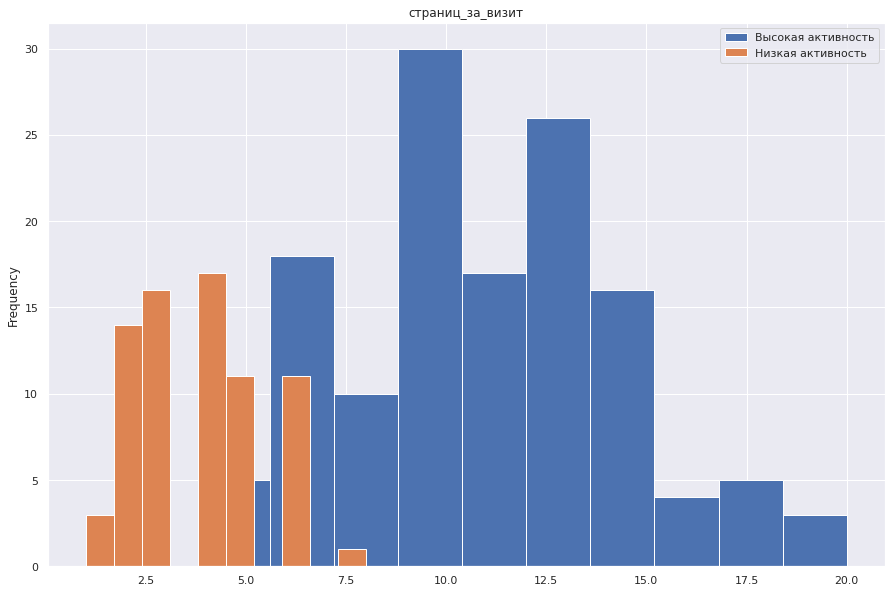

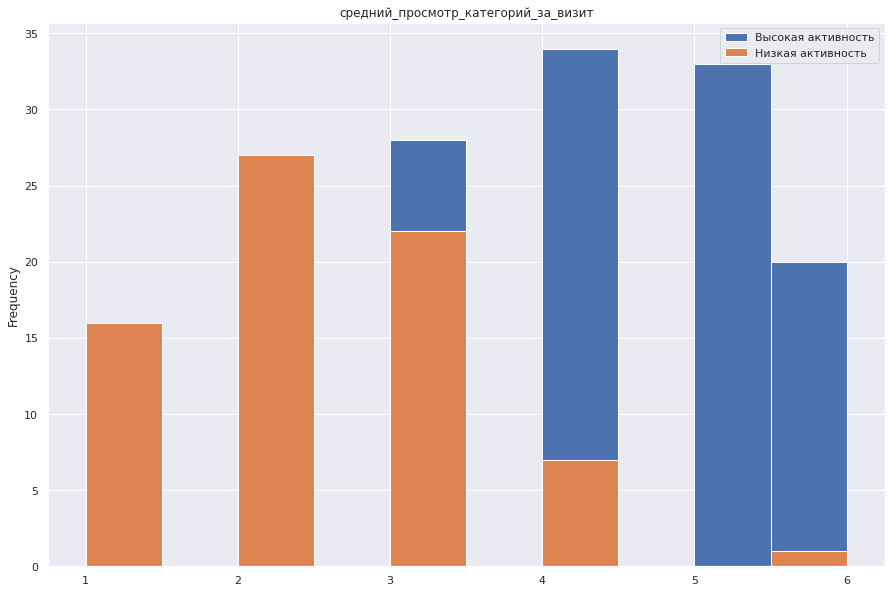

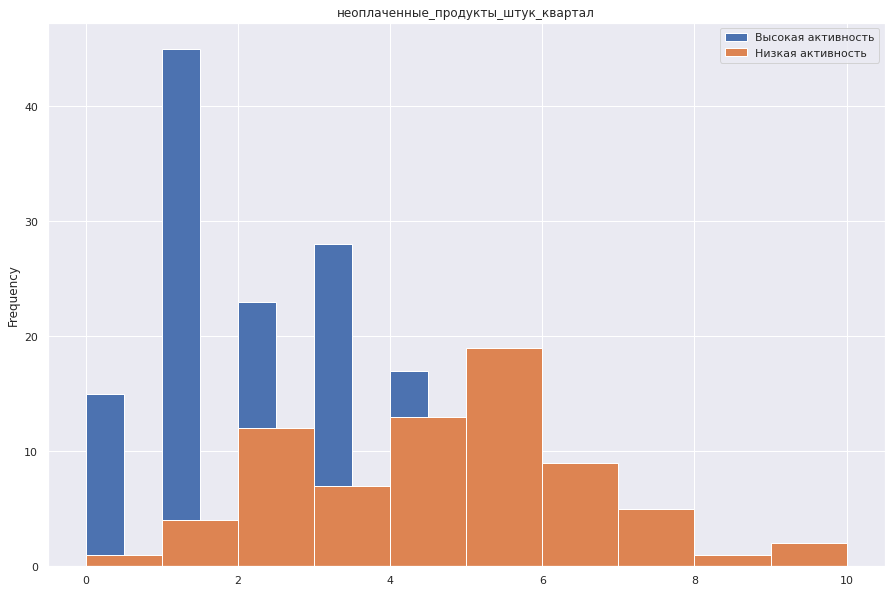

In [117]:
for category in high_impact:
    data_high_activity[category].plot(kind='hist', label='Высокая активность', title=category)
    data_low_activity[category].plot(kind='hist', label='Низкая активность')
    plt.legend()
    plt.show()


In [118]:
_num_cols = data_low_activity[data_low_activity.columns[(data_low_activity.columns != 'длительность')]].select_dtypes(include='number').columns
_num_cols

Index(['маркет_актив_6_мес', 'маркет_актив_тек_мес', 'акционные_покупки',
       'средний_просмотр_категорий_за_визит',
       'неоплаченные_продукты_штук_квартал', 'ошибка_сервиса',
       'страниц_за_визит', 'минут_предыдущий_месяц', 'минут_текущий_месяц',
       'выручка_предыдущий_месяц', 'выручка_препредыдущий месяц',
       'выручка_текущий_месяц', 'вероятность_снижения', 'прибыль'],
      dtype='object')

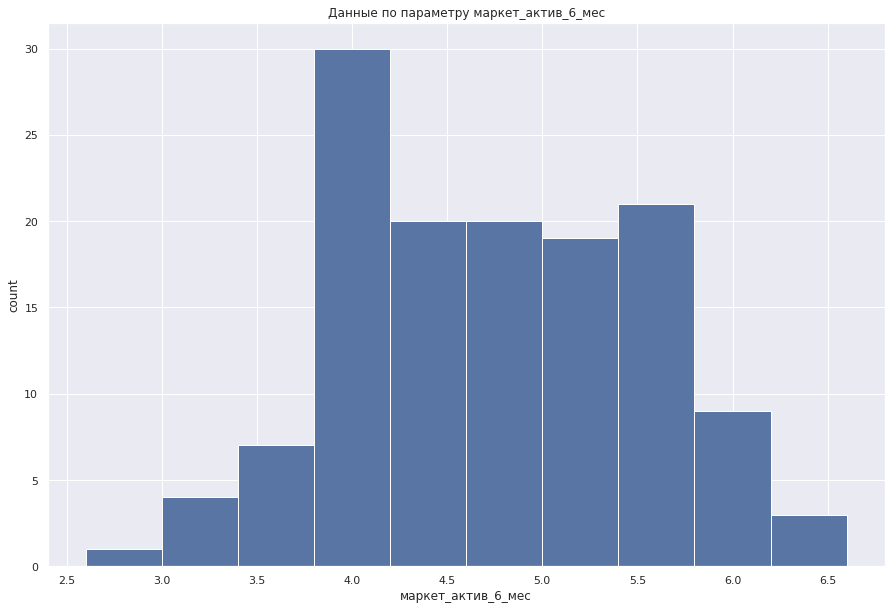

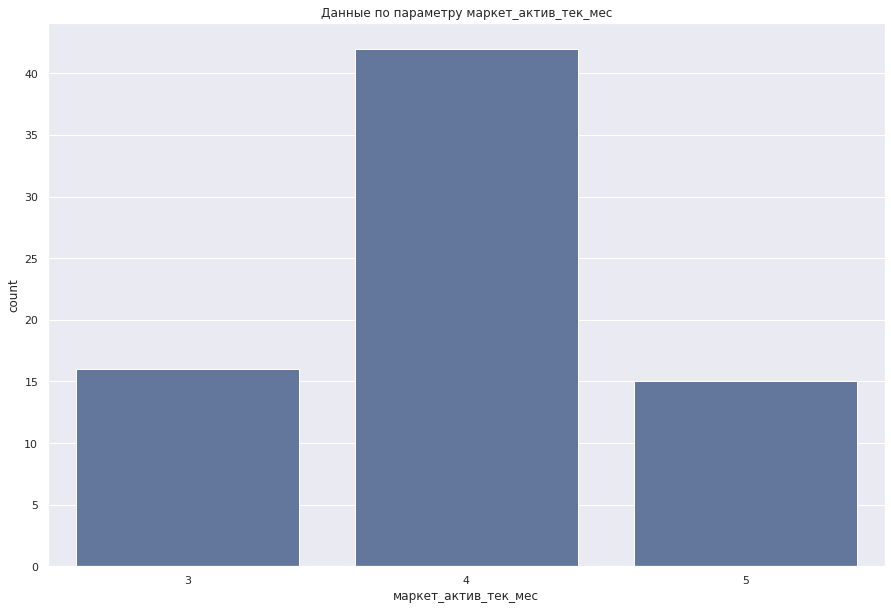

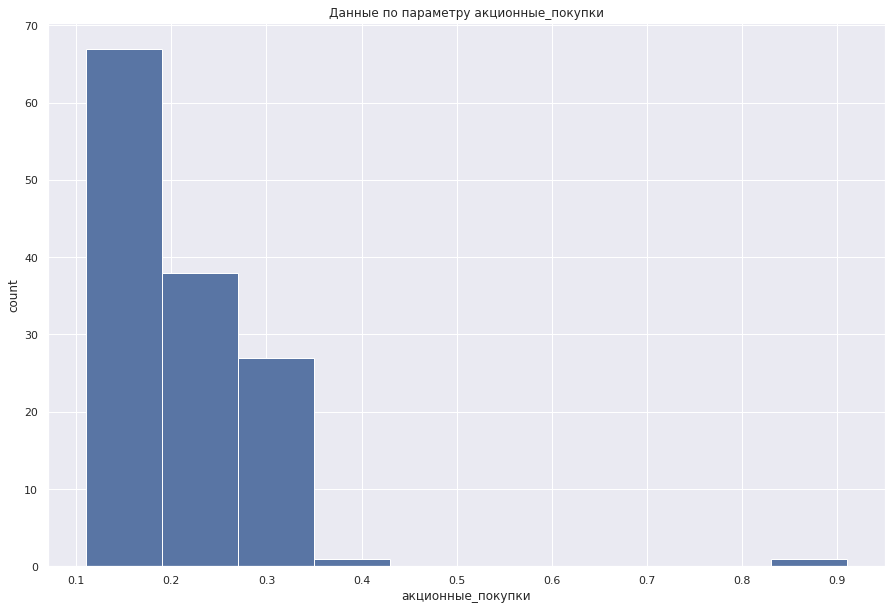

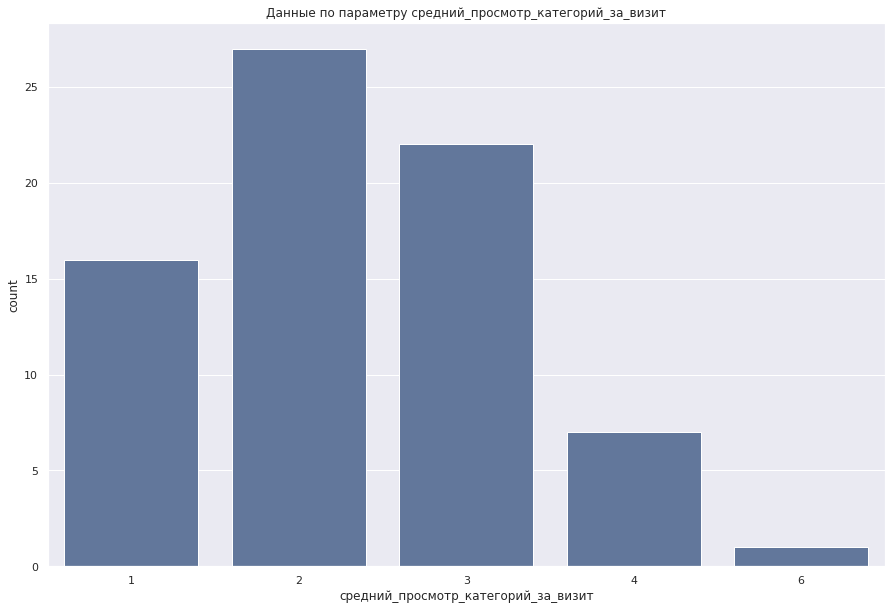

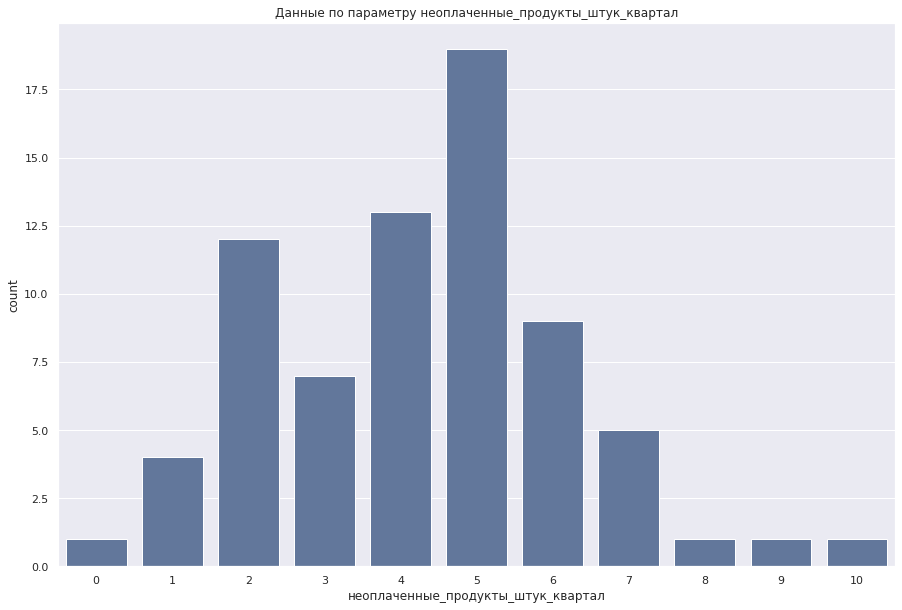

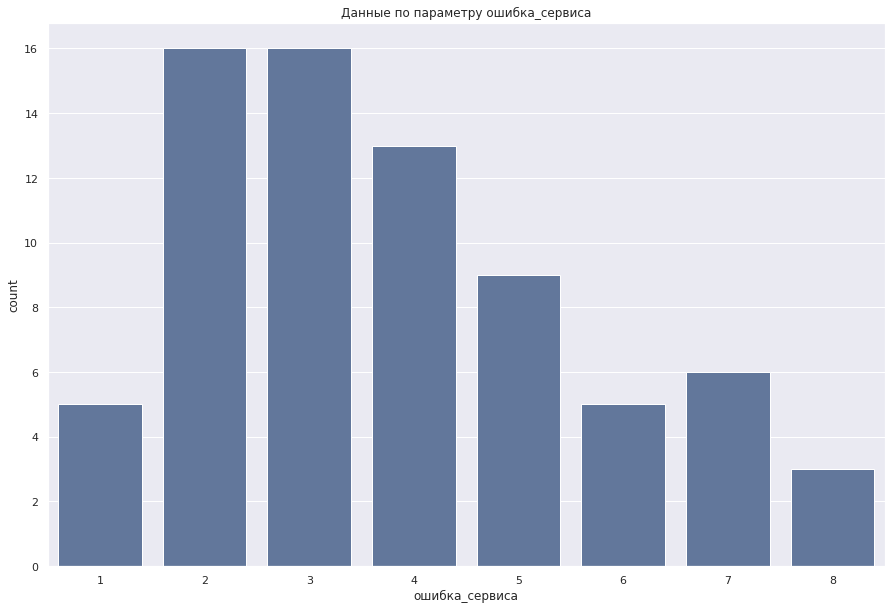

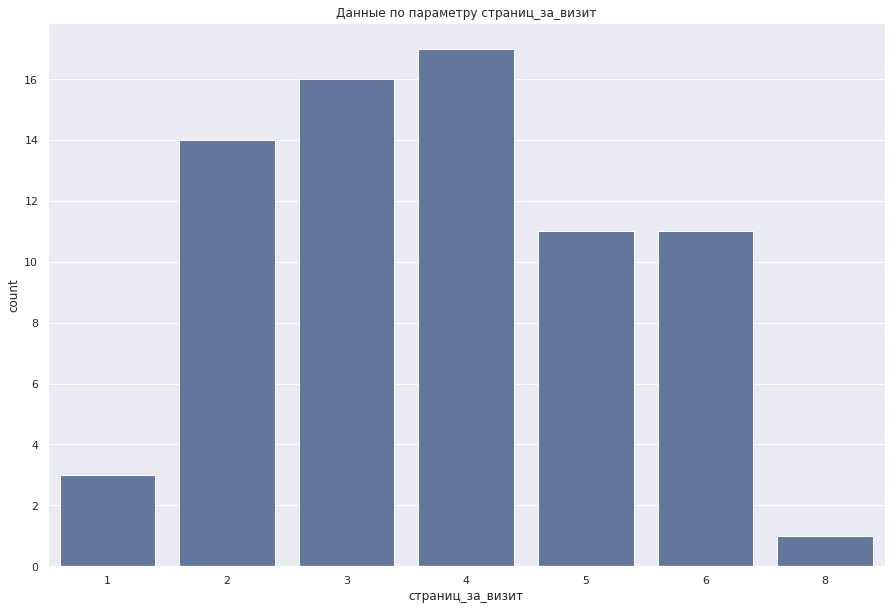

KeyError: 'минут_предыдущий_месяц'

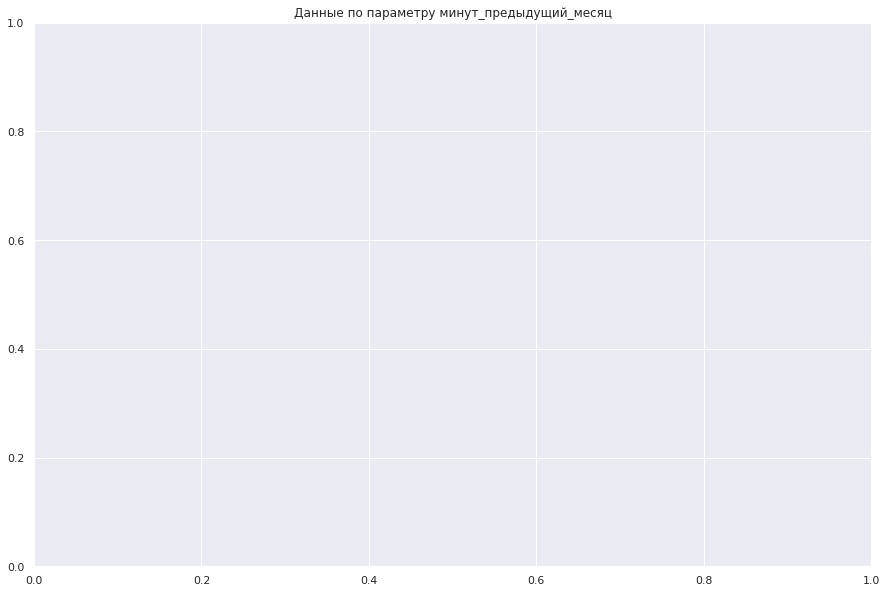

In [120]:
sns.set_theme(rc={'figure.figsize':(15,10)})
for column in _num_cols:
    plt.figure()
    plt.title(f'Данные по параметру {column}')
    
    if data_market_file[column].dtypes == 'int64':
        sns.countplot(x=column, data=data_low_activity, color='#5975a4')
        
    else:
        data_high_activity[column].plot(kind='hist', y='count', color='#5975a4')
    plt.xlabel(column)    
    plt.ylabel('count')
    plt.show()
    

In [122]:
# high_impact_1 = ['минут_текущий_месяц',
#                'минут_предыдущий_месяц',
#                'страниц_за_визит',
#                'средний_просмотр_категорий_за_визит',
#                'неоплаченные_продукты_штук_квартал' ]

In [123]:
# for column in high_impact_1:
#     plt.figure()
    
#     plt.title(f'Сравнение групп высокой и низкой покупательской активности по параметру {column}',fontdict = {'fontsize' : 20} )
#     sns.countplot(data=data_low_activity, x=column, color='green', saturation=0.8)
#     sns.countplot(data=data_high_activity, x=column, color='blue', saturation=0.2)
#     plt.legend(['низкая активность', 'высокая активность'])
#     plt.show()

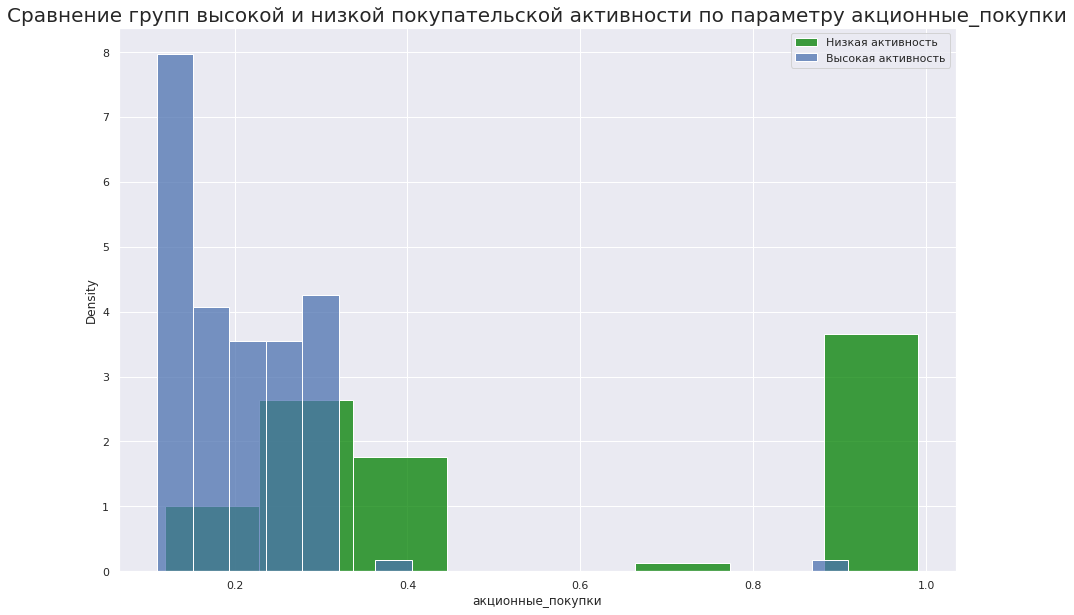

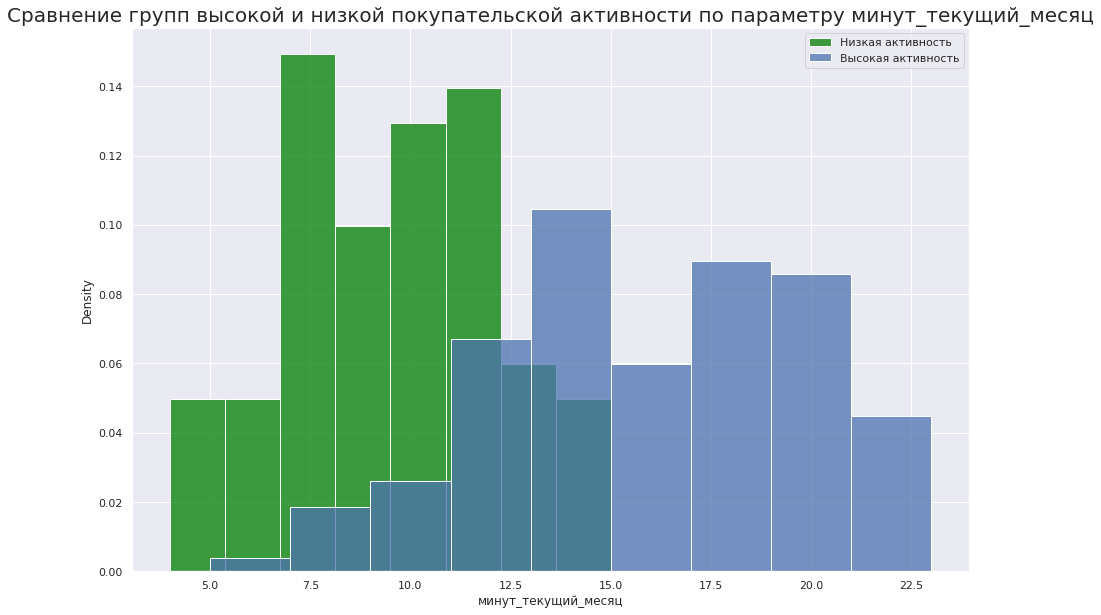

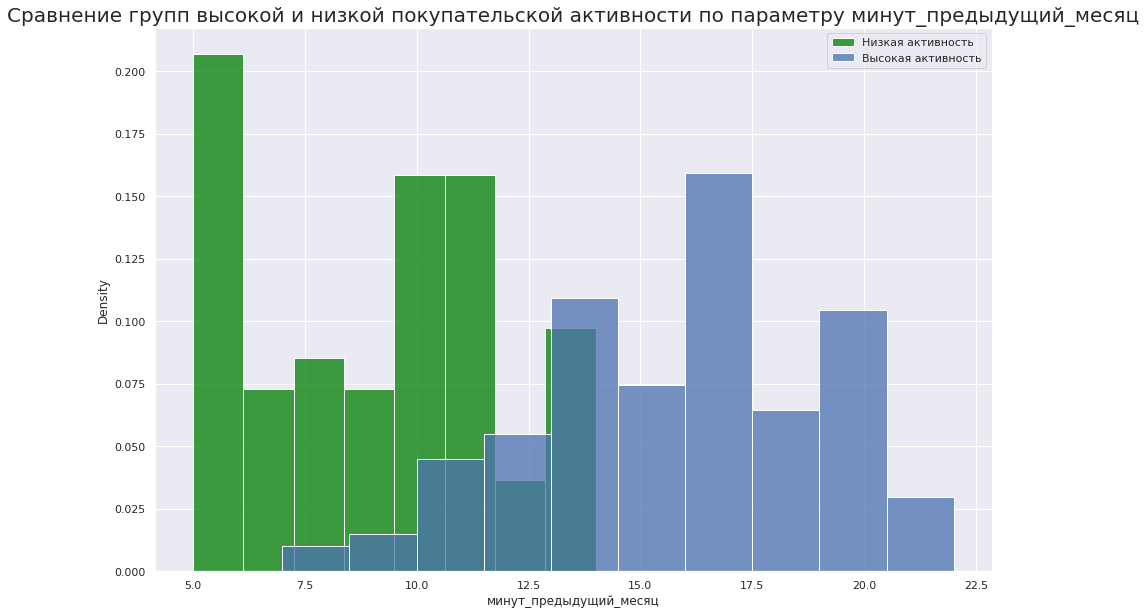

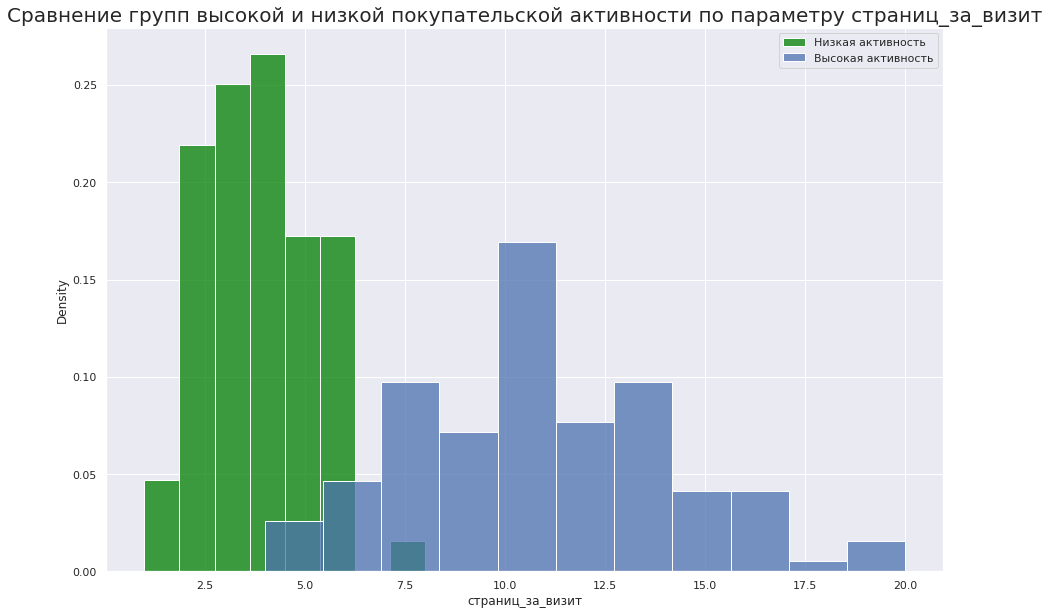

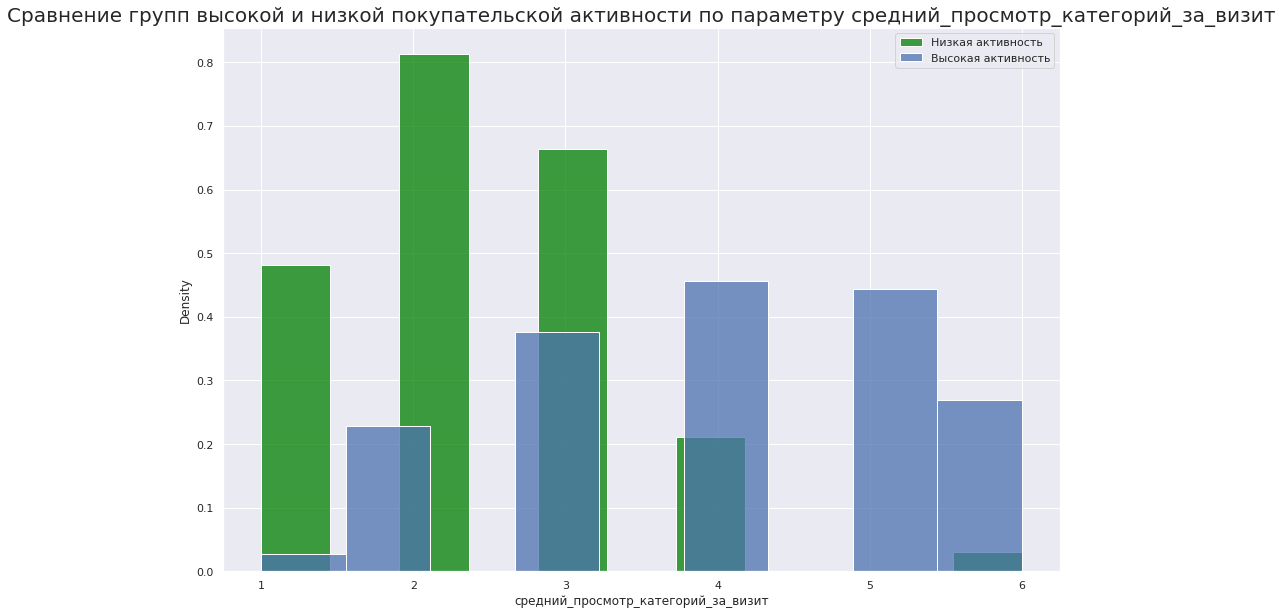

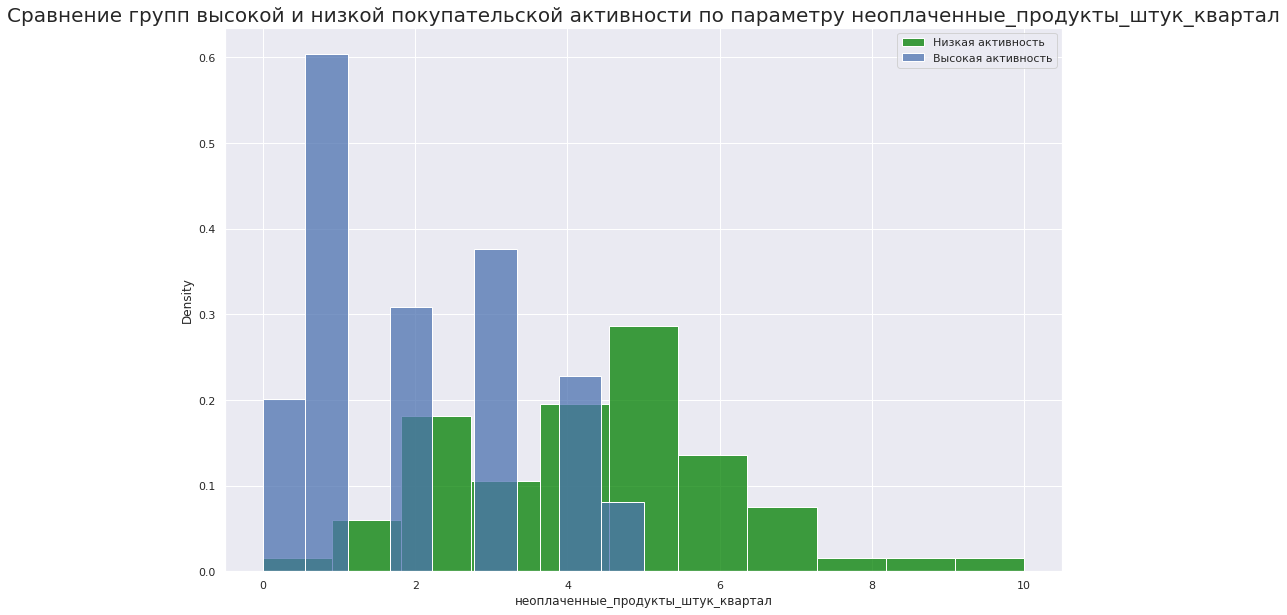

In [124]:
for column in high_impact:
    plt.figure()
    
    plt.title(f'Сравнение групп высокой и низкой покупательской активности по параметру {column}',fontdict = {'fontsize' : 20} )
    sns.histplot(data=data_low_activity[column], stat='density', common_norm=False, color='green')
    sns.histplot(data=data_high_activity[column], stat='density', common_norm=False)
    
    plt.legend(['Низкая активность', 'Высокая активность'])
    plt.show()

После построения гистрограмм по самым весомым признакам у самой активной и пассивной групп можго говорить о том, что пользователи с высокой покупательской:
* активностью редко покупают товары по акции
* проводят больше времени на маркетплейсе
* просматривают больше страниц и категорий
* не держат большое количество товаров в корзине

## Общий вывод
опишите задачу;
опишите исходные данные и проведённую предобработку;
напишите, что вы сделали для поиска лучшей модели;
укажите лучшую модель;
добавьте выводы и дополнительные предложения для выбранного сегмента покупателей.

Перед нами стояла задача разработать решение, которое позволит персонализировать предложения постоянным клиентам, чтобы увеличить их покупательскую активность. <br>
Для решения поставленной задачи нам были даны данные о покупателях и их активности на маркетплейсе:
* Данные о поведении покупателя на сайте, о коммуникациях с покупателем и его продуктовом поведении.
* Данные о выручке, которую получает магазин с покупателя
* Данные о времени (в минутах), которое покупатель провёл на сайте в течение периода
* Данные о среднемесячной прибыли покупателя за последние 3 месяца <br><br>
С полученными данным проведены операции по предобработке: 
* Названия столбцов приведены к общему виду
* Данные проверены на наличие пропусков и дубликатов
* Исправлены опечатки и грамматические ошибки <br><br>
Для поиска лучшей поиска лучшей модели сделали следующее:
* Подготовили данные 
* Использовали пайплайны для применения всех изученных моделей
* Обучены 4 модели с подбором гиперпараметров ( KNeighborsClassifier(), DecisionTreeClassifier(), LogisticRegression() и  SVC()
* Выбраны метрики для оценки качества модели (ROC-AUC и F1-score)
* Отобрана лучшая модель с лучшими параметрами с помощью RandomizedSearch, лучшей моделью стала LogisticRegression(C=1, penalty='l1', random_state=42, solver='liblinear')<br><br>
Далее была выбрана группа риска, 15% пользователей для которых модель предсказала большую вероятность снижения покупательской активности. Группу риска сравнили с 15% самых активных покупателей, и выявили что группа риска:
* Много покупает по акции
* Мало времени проводит на маркетплейсе
* Посещает мало страниц
* Просматриваем мало категорий товаров
* Держит большое количество товаров в корзине не покупая их <br><br>
Проанализировав это можно предложить предлагать покупателям из группы риска чуть больше акционных предложений на те группы товаров, которые они просматривают и покупают, либо специальные предлоджения на товары в корзине. 
